In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib

valid_metrics = ['rmseloss', 'maeloss', 'quantile score\n(q=0.3)', 'accuracy rate']
ffnn_params=set()
rnn_params=set()
cnn_params=set()
all_results = []

for file in os.listdir('training results'):
    if file[-4:] != '.npz' or 'drop_cols' not in file:
        continue
    f = np.load(os.path.join('training results', file))
    # Mean over k folds, extract value from last epoch
    t = f['train_loss'].mean(axis=-1)
    v = f['valid_loss'].mean(axis=-1)
    v[0] = np.sqrt(v[0])
    
    params = file.split('--')
    nn_dict = {'type': params.pop(0)[:-1], 'train':t, **dict(zip(valid_metrics,v))}
    params[-1] = params[-1][:-4]
    for i in range(len(params)-1):
        params[i] = params[i][:-1]
    for i in range(len(params)):
        sep = params[i].rfind('_')
        par = params[i][sep+1:]
        try:
            nn_dict[params[i][:sep]] = float(par)
        except ValueError:
            nn_dict[params[i][:sep]] = par
        
    if nn_dict['type']=='ffnn':
        ffnn_params=[key for key in nn_dict.keys() if key not in ['train', 'case','type']+valid_metrics]
    elif nn_dict['type']=='cnn':
        cnn_params=[key for key in nn_dict.keys() if key not in ['train', 'case','type']+valid_metrics]
    elif nn_dict['type']=='rnn':
        rnn_params=[key for key in nn_dict.keys() if key not in ['train', 'case','type']+valid_metrics]
    
    all_results.append(nn_dict)
    
    
    

In [2]:
def plot_parameter(par_plot, subset, do_plot=True):
    par_plot_values=[]
    nns_to_check=[]
    for nn in all_results:
        if subset.items() <= nn.items():
            nns_to_check.append(nn)
            par_plot_values.append(nn[par_plot])



    default_value = max(par_plot_values, key=par_plot_values.count)

    for nn in nns_to_check:
        if nn[par_plot] != default_value:
            all_default_values = {key: nn[key] for key in nn.keys() if key not in [par_plot, 'train']+valid_metrics}
            break
    
    if do_plot:
        fig, ax = plt.subplots(nrows=len(valid_metrics),ncols=2, figsize=(10,10), dpi=100, sharex='col',sharey='row')
        for i, metric in enumerate(valid_metrics):
            for nn in nns_to_check:
                if all_default_values.items() <= nn.items():
                    ax[i,0].plot(nn[par_plot],nn[metric][-1],'.',markersize=10)
                    ax[i,1].plot(nn[metric],'.',markersize=10)


            ax[i,0].set(ylabel=metric)
            if i == len(valid_metrics)-1:
                ax[i,0].set(xlabel=par_plot)
                ax[i,1].set(xlabel='epoch')

        fig.suptitle(par_plot)
        fig.tight_layout()
        plt.savefig(f'plots/sensitivity_{subset["type"]}_{par_plot}_case_{subset["case"]}.pdf')
        plt.show()
    
    
    return nns_to_check
    
    
    
    

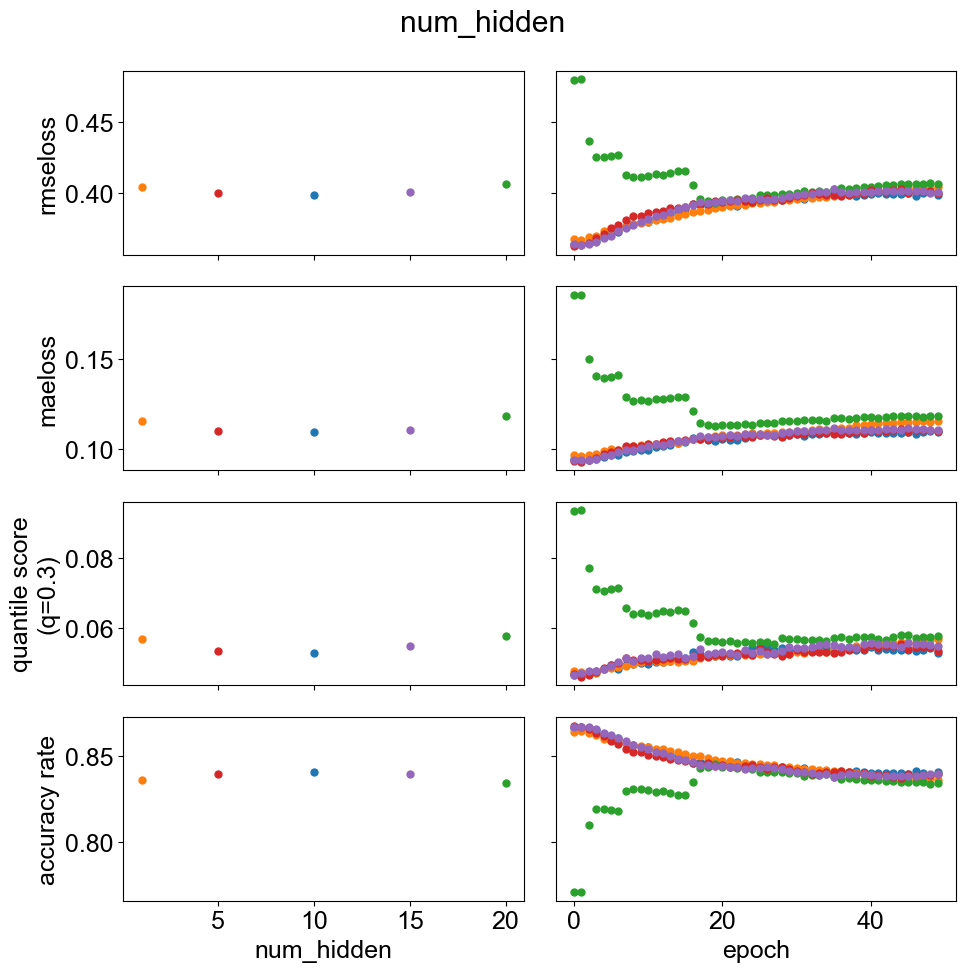

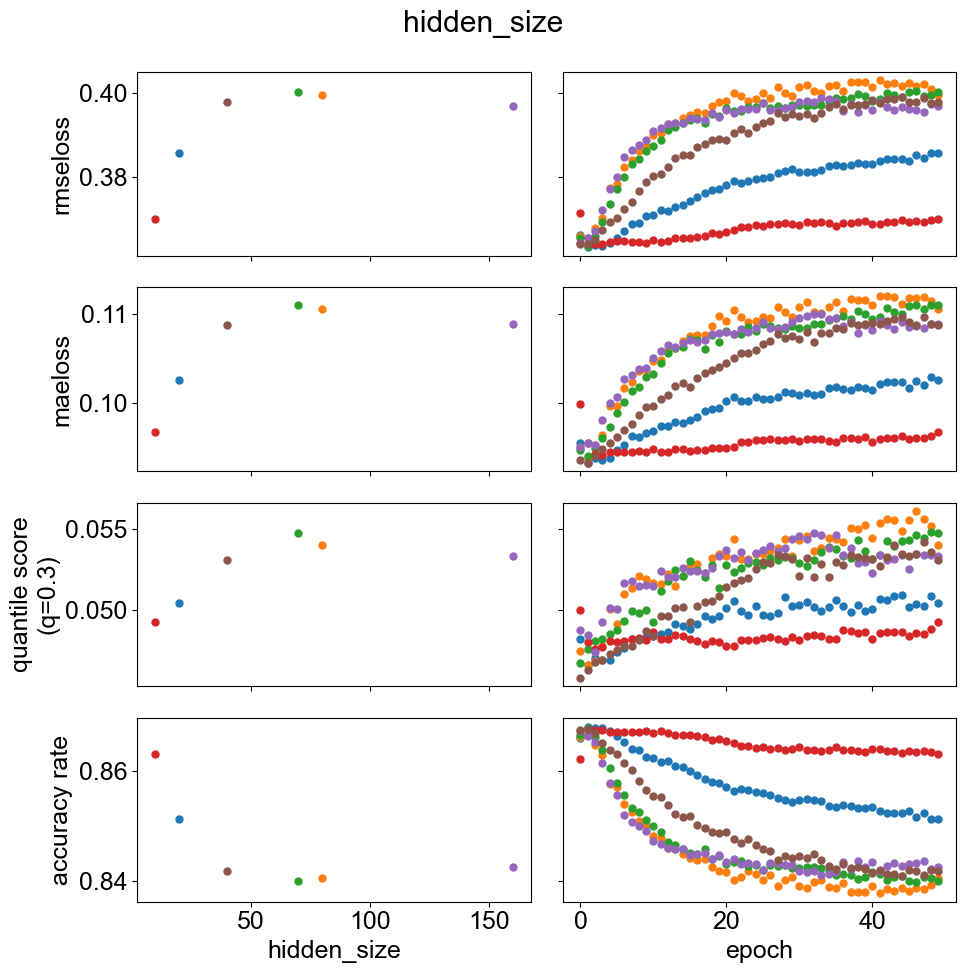

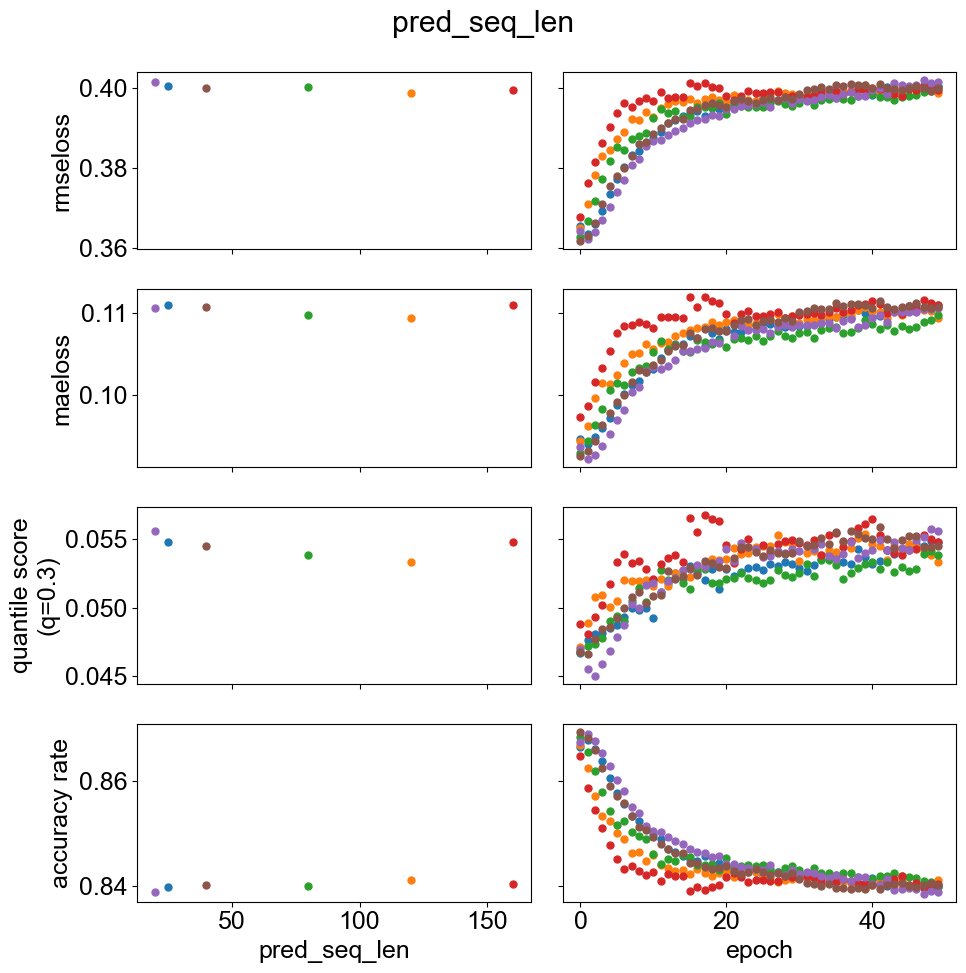

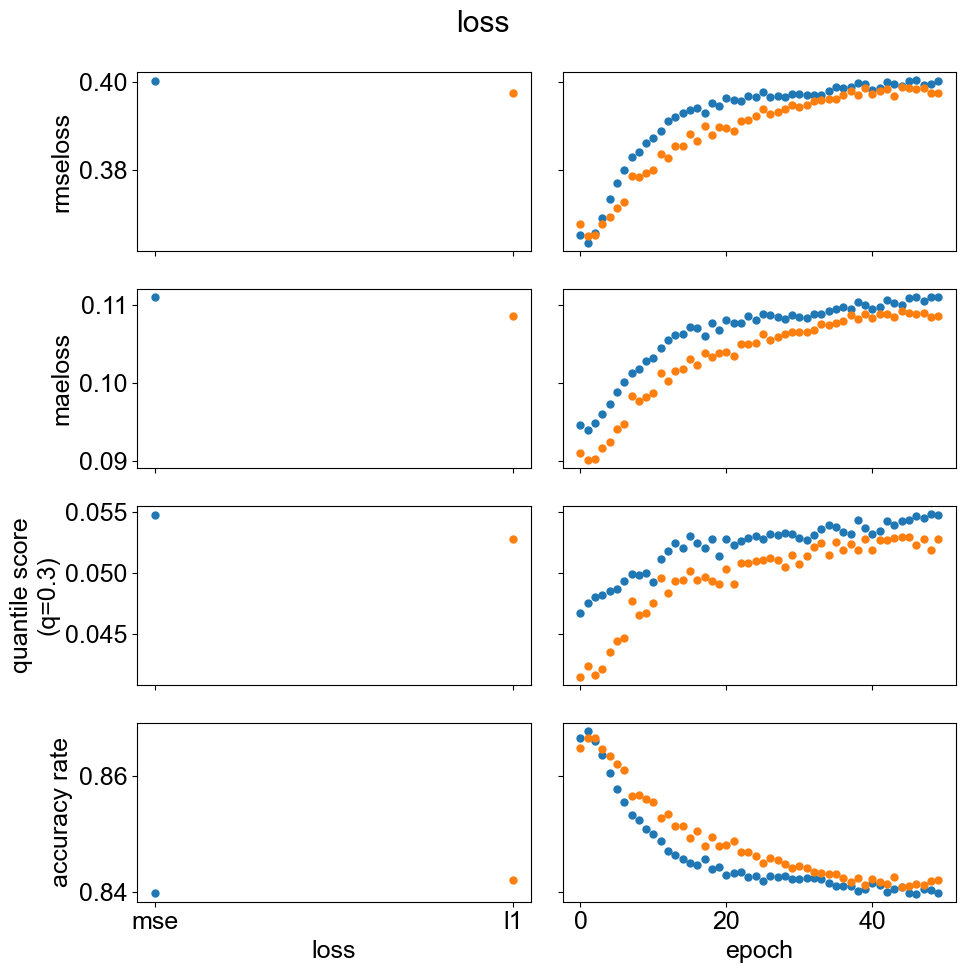

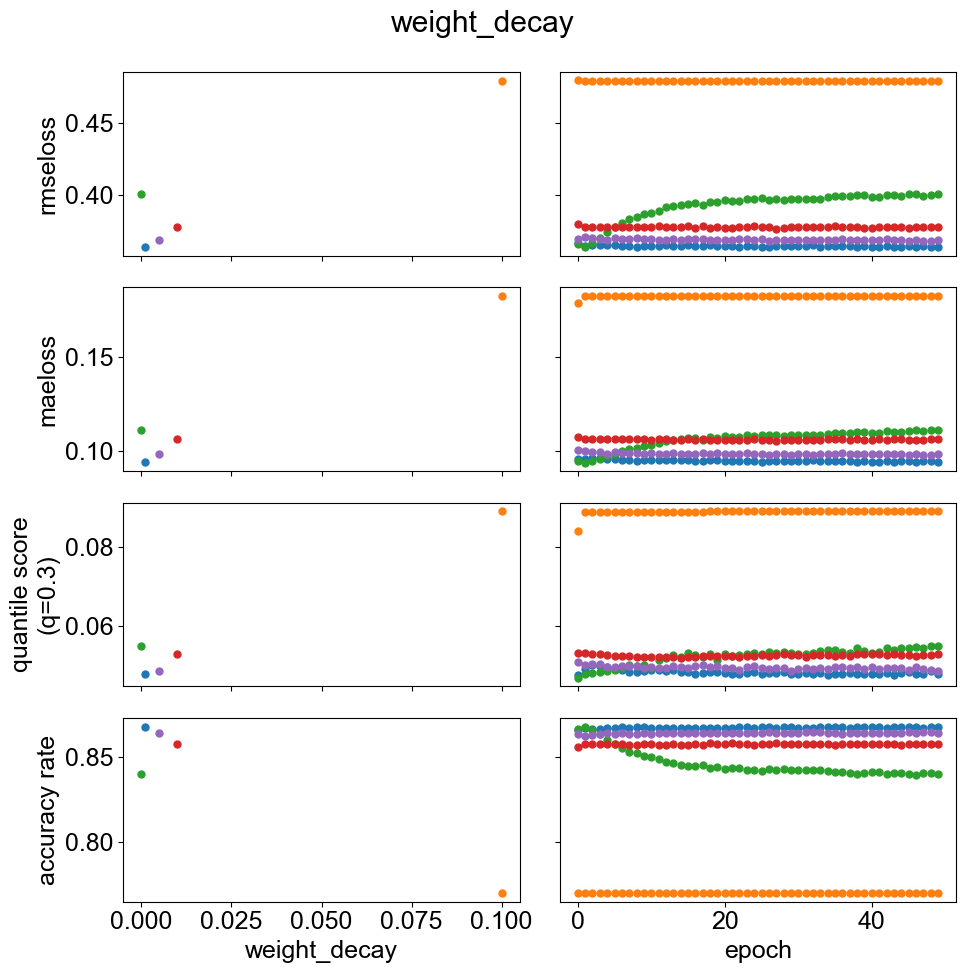

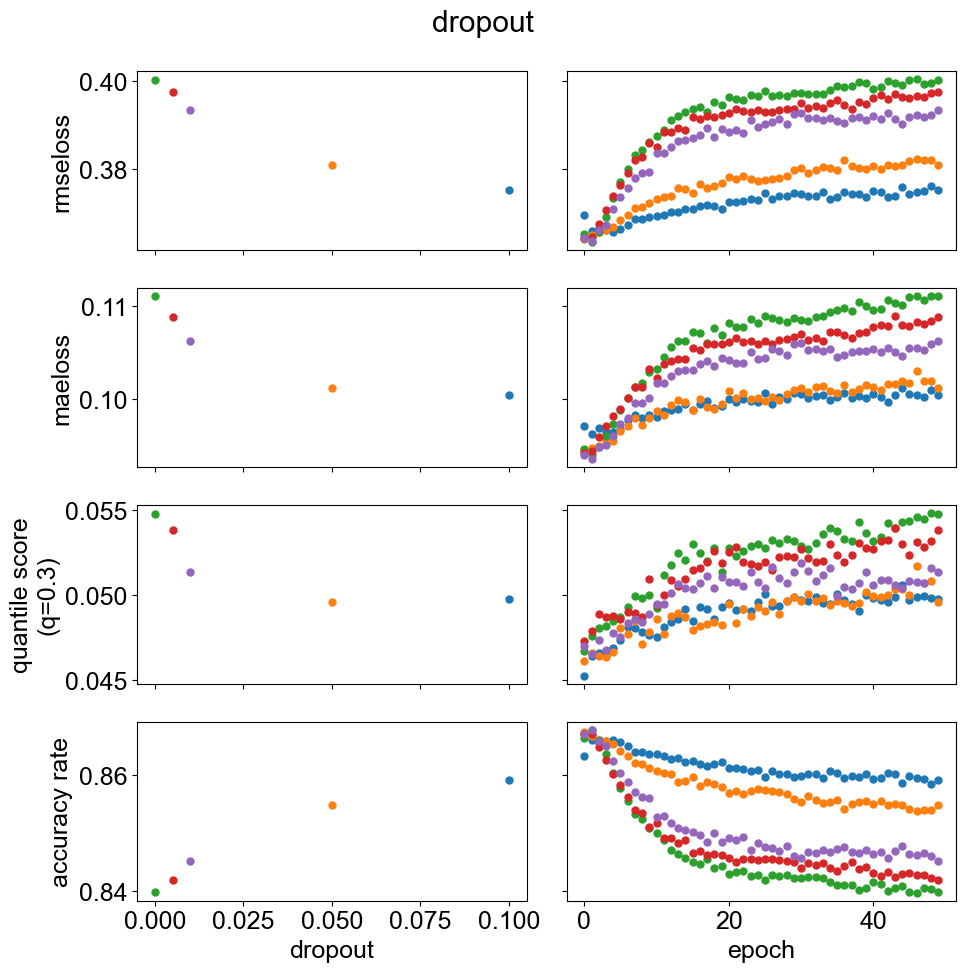

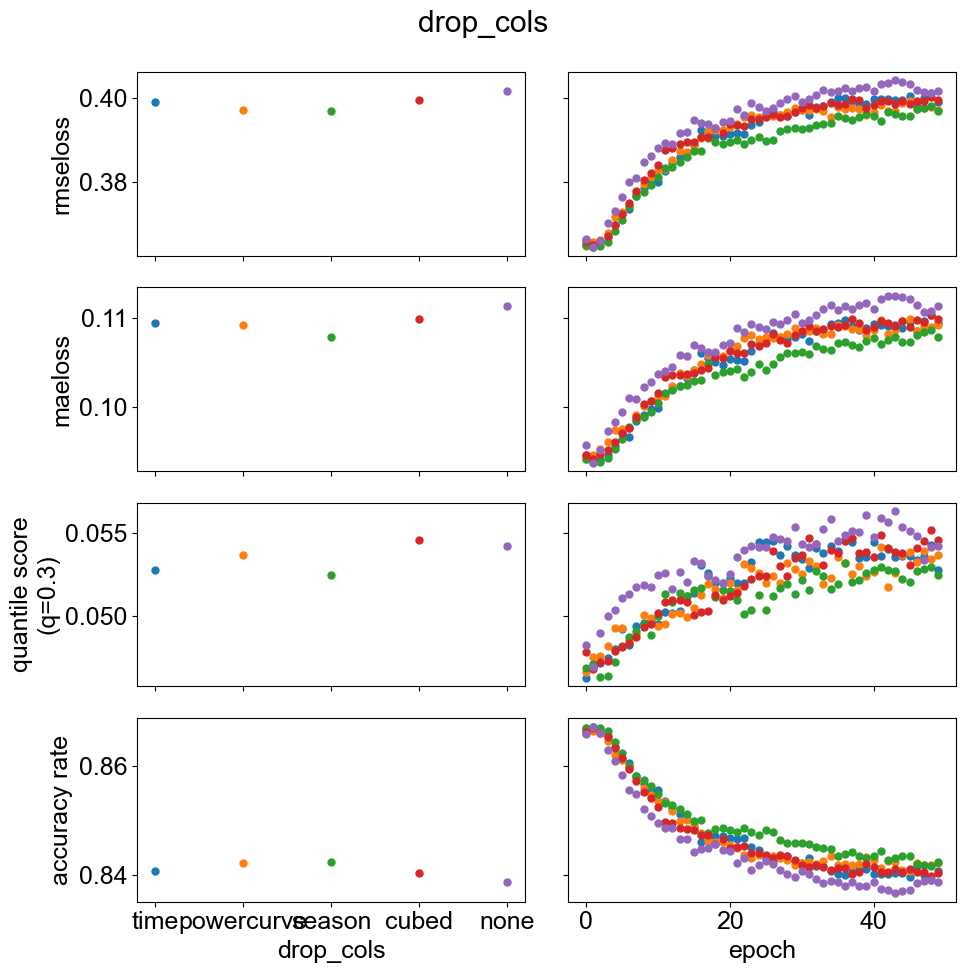

{'type': 'ffnn', 'train': array([0.02212616, 0.01708351, 0.01690643, 0.01679302, 0.01671777,
       0.01664741, 0.01664144, 0.01658711, 0.01657543, 0.0165384 ,
       0.01651248, 0.01650614, 0.01651141, 0.01647236, 0.01644157,
       0.01645322, 0.01645489, 0.01641627, 0.01643869, 0.0164163 ,
       0.01641666, 0.01640991, 0.01638287, 0.01638712, 0.01639658,
       0.01637568, 0.01637554, 0.0163926 , 0.01637901, 0.01637922,
       0.01637574, 0.01637299, 0.01637456, 0.01636264, 0.01635922,
       0.01636472, 0.01633051, 0.01635668, 0.01634445, 0.01634866,
       0.01635634, 0.01634838, 0.01634013, 0.01635227, 0.01634634,
       0.01632686, 0.01634146, 0.01635023, 0.01634287, 0.01632297]), 'rmseloss': array([0.36596213, 0.36436092, 0.36506617, 0.36497308, 0.36473197,
       0.36477636, 0.36396803, 0.36421667, 0.36349789, 0.36389014,
       0.36435639, 0.36420586, 0.36439934, 0.36430173, 0.36434985,
       0.36472743, 0.36418095, 0.36425838, 0.36442631, 0.36437119,
       0.36402155, 0.3

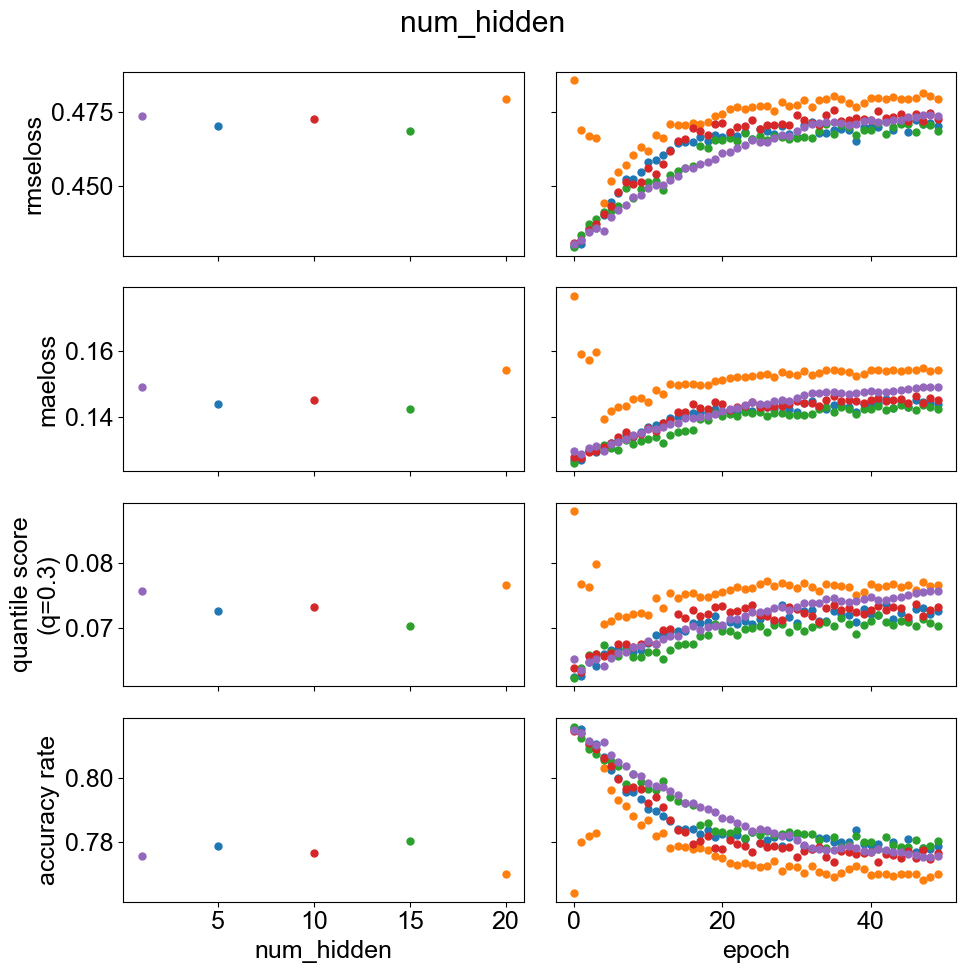

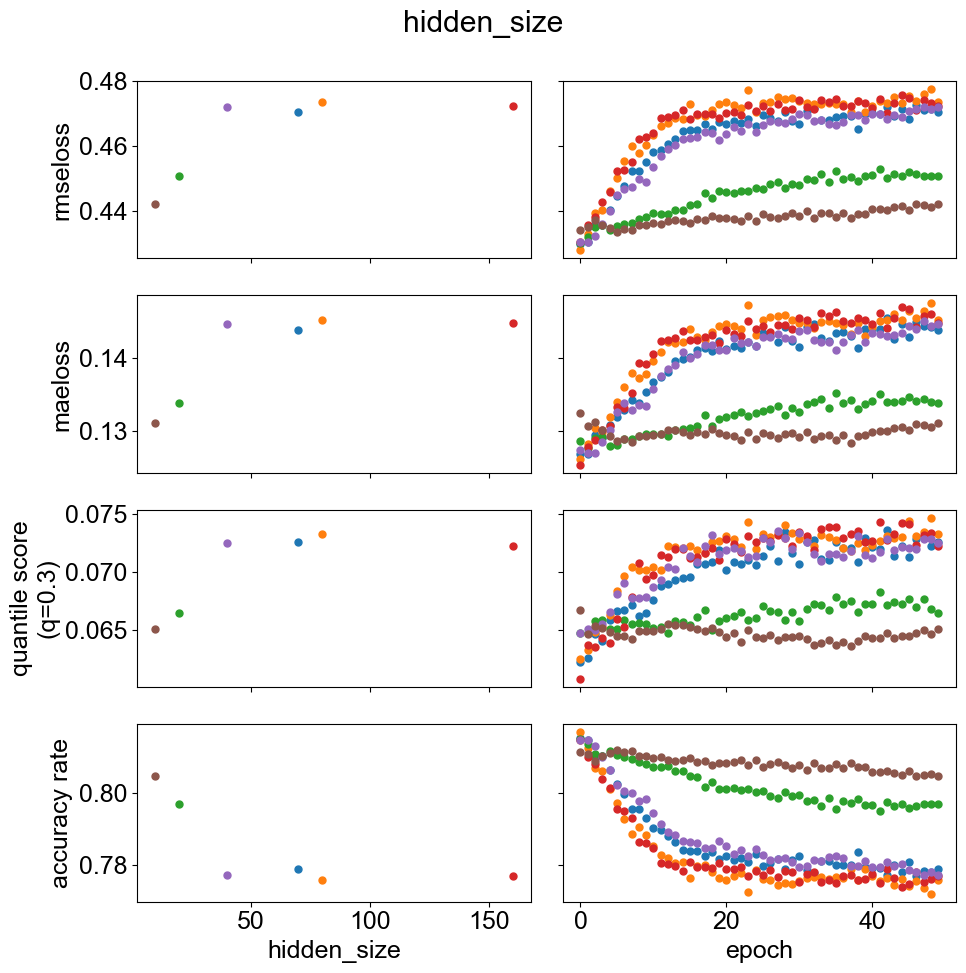

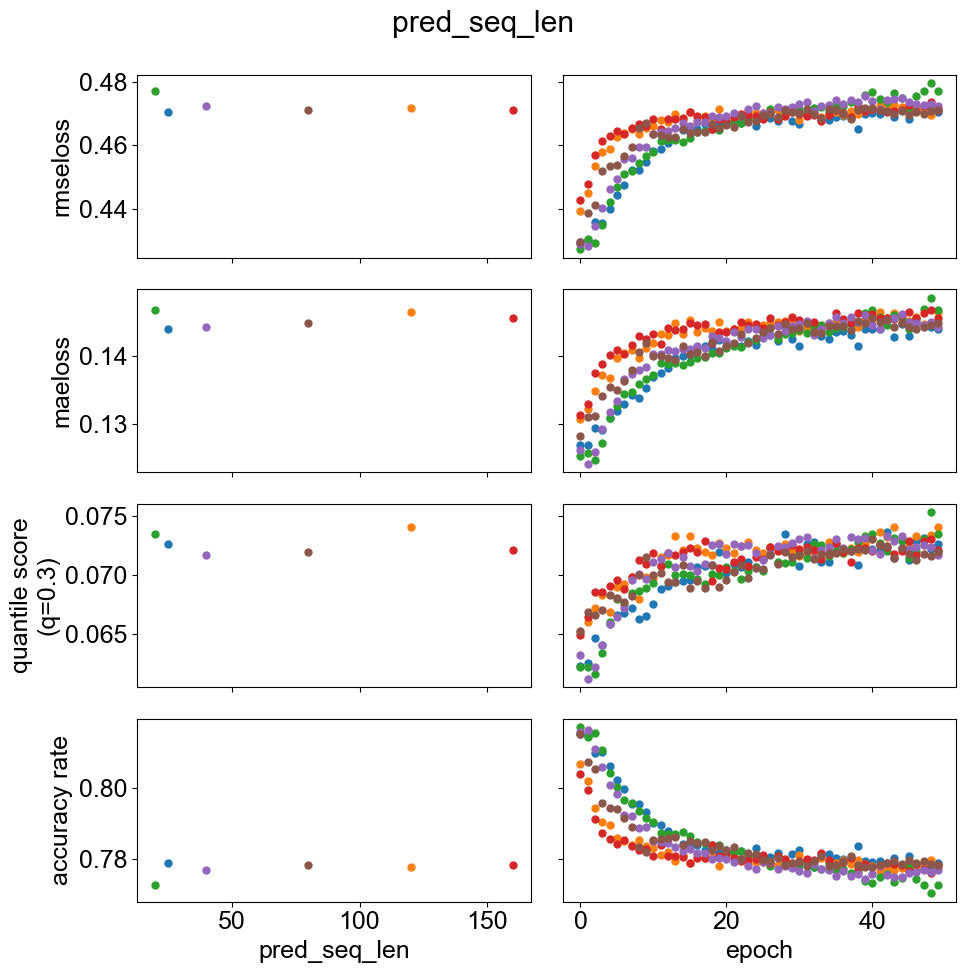

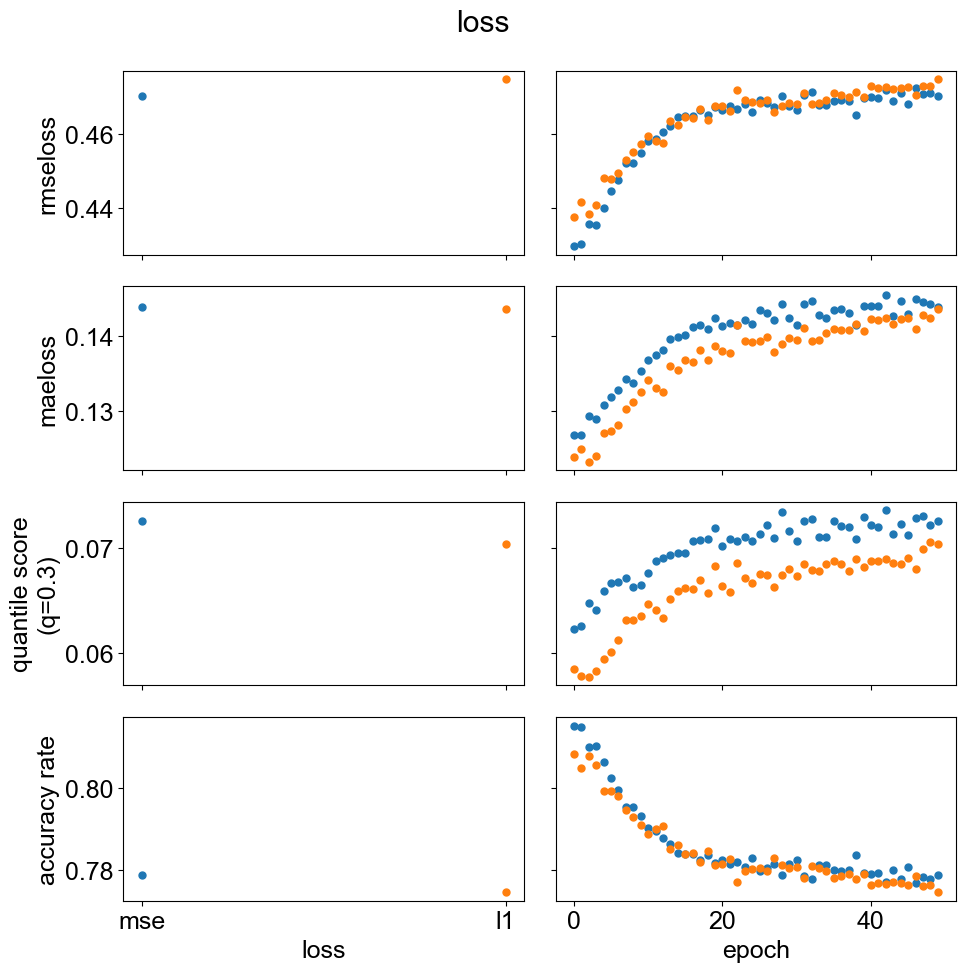

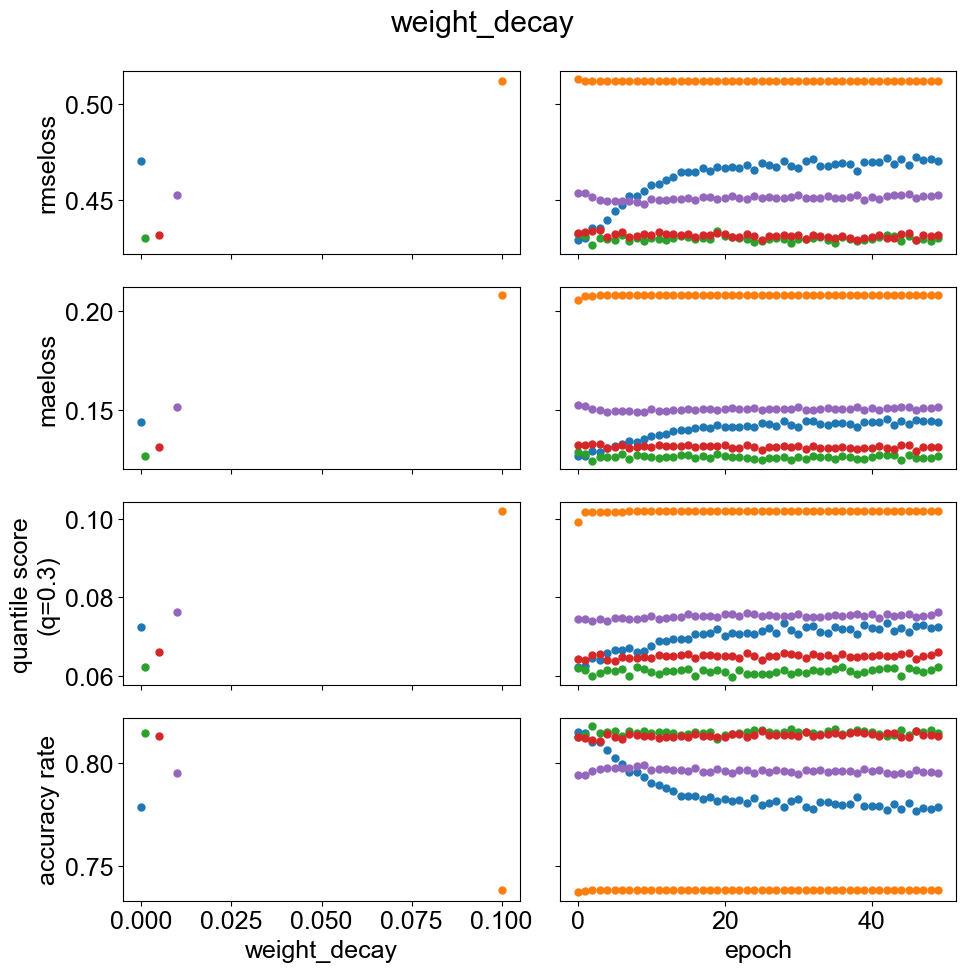

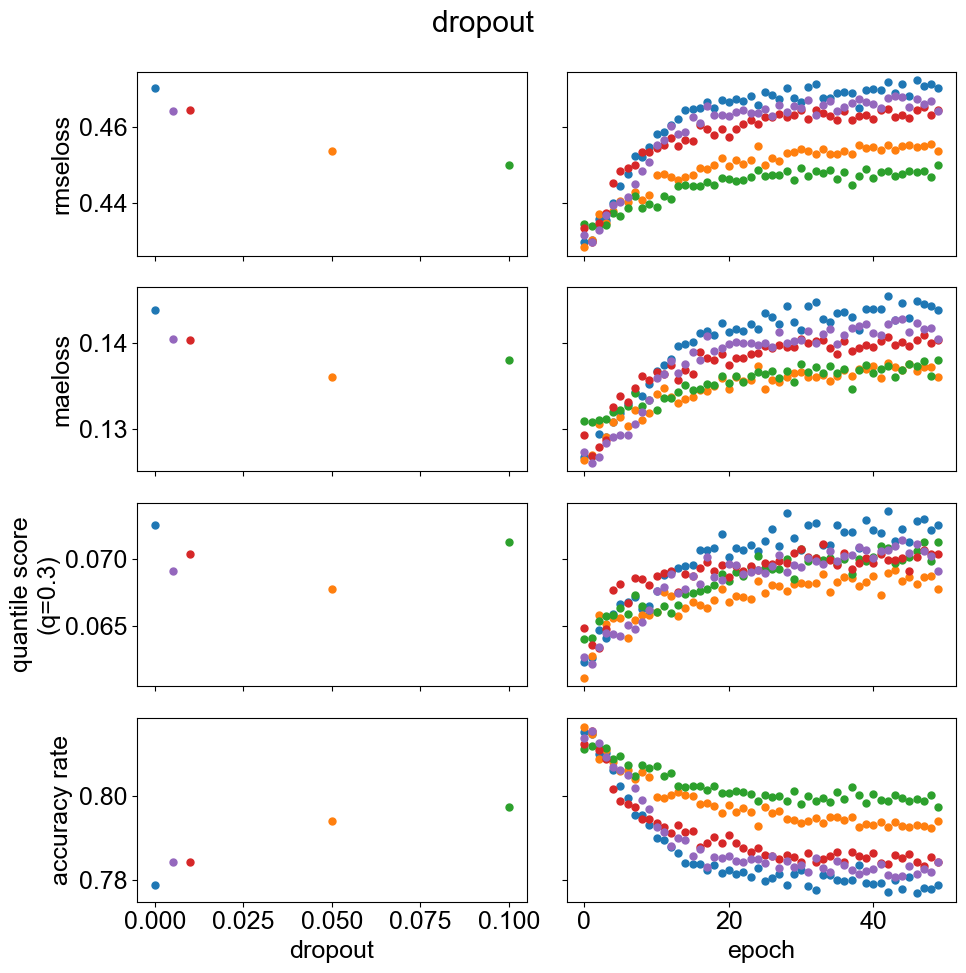

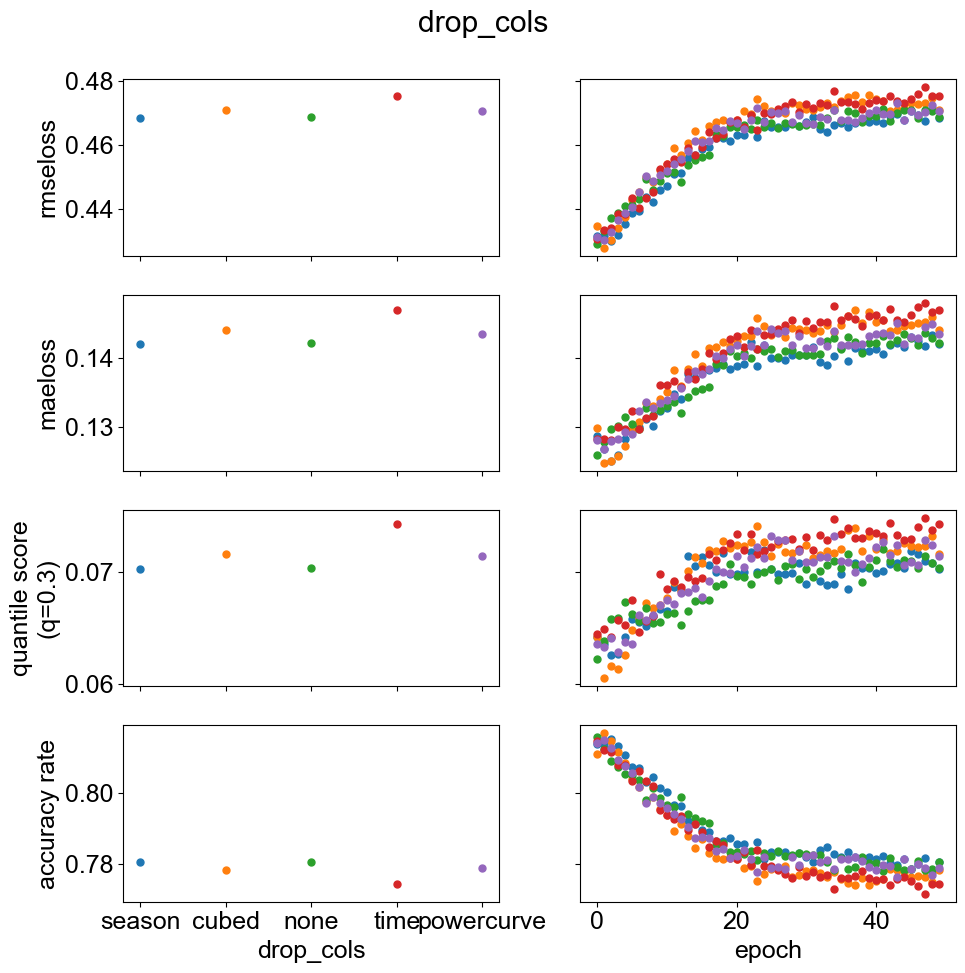

{'type': 'ffnn', 'train': array([0.03556487, 0.03039716, 0.02984853, 0.0295809 , 0.02938656,
       0.02925051, 0.02911779, 0.0290422 , 0.02898839, 0.02889518,
       0.02886492, 0.02880753, 0.02874169, 0.02874261, 0.02866833,
       0.02864382, 0.02866   , 0.02857764, 0.02857945, 0.02852992,
       0.02851743, 0.02853141, 0.0284665 , 0.02846408, 0.02846763,
       0.02848998, 0.02844398, 0.02843407, 0.02843171, 0.02840656,
       0.02842024, 0.0284363 , 0.02836629, 0.02835985, 0.02838553,
       0.02835634, 0.02838297, 0.02836105, 0.02835741, 0.02837972,
       0.02834981, 0.02837497, 0.02835049, 0.02832626, 0.02833482,
       0.02831364, 0.02832251, 0.02832394, 0.02830429, 0.02829942]), 'rmseloss': array([0.4328446 , 0.43147286, 0.42671646, 0.43059442, 0.43001692,
       0.42950345, 0.43196161, 0.42919286, 0.43059522, 0.42922694,
       0.43053503, 0.42992557, 0.42971195, 0.43072282, 0.43152132,
       0.43099148, 0.43001787, 0.4304636 , 0.42996728, 0.43404634,
       0.43178555, 0.4

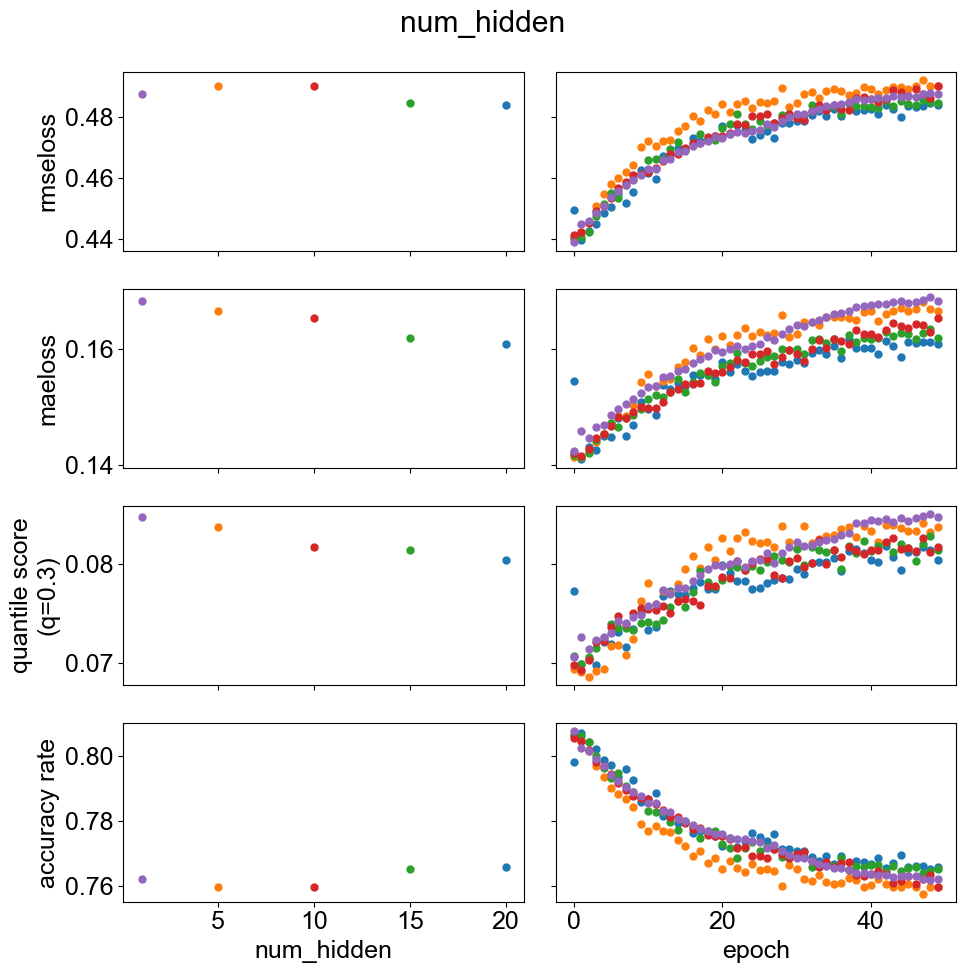

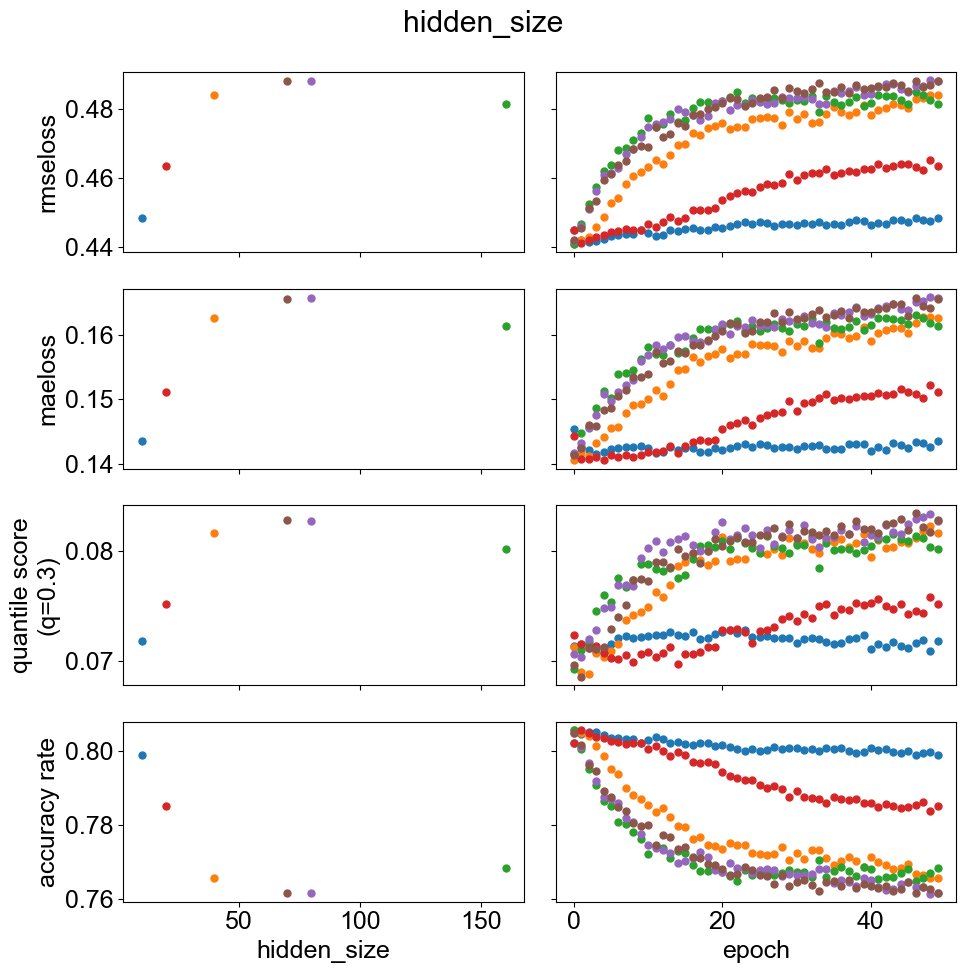

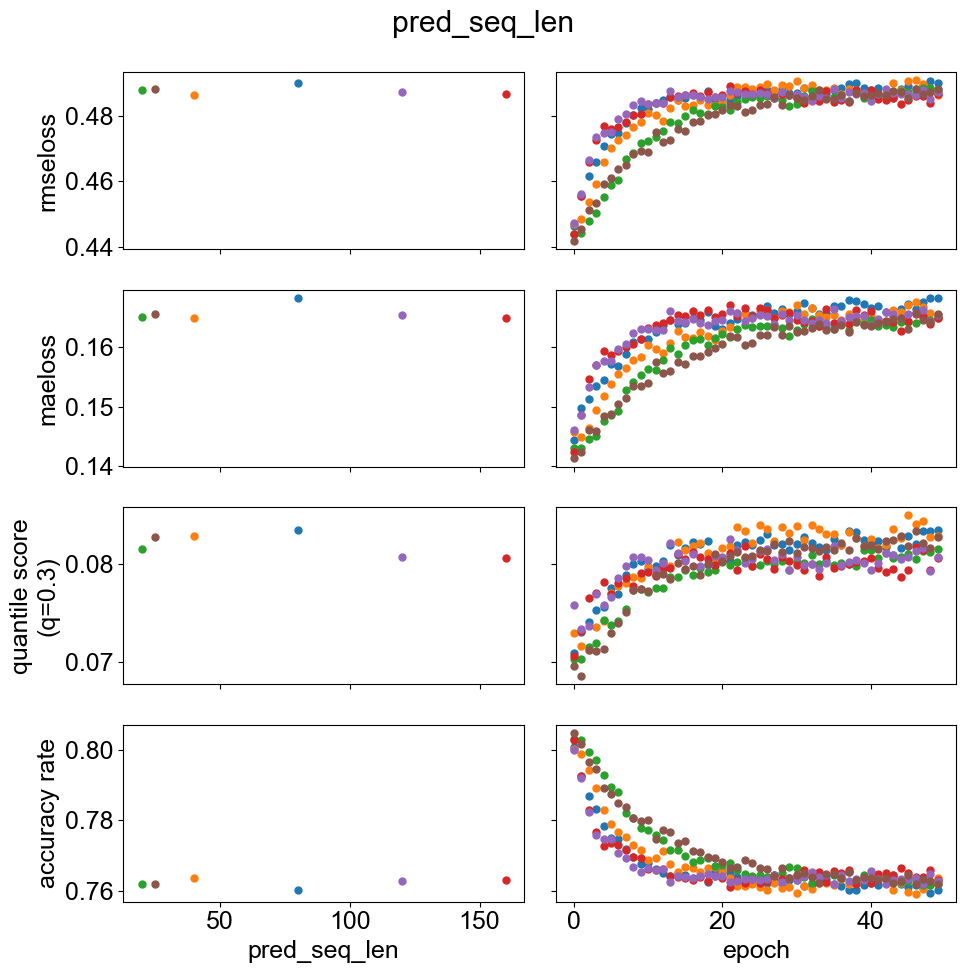

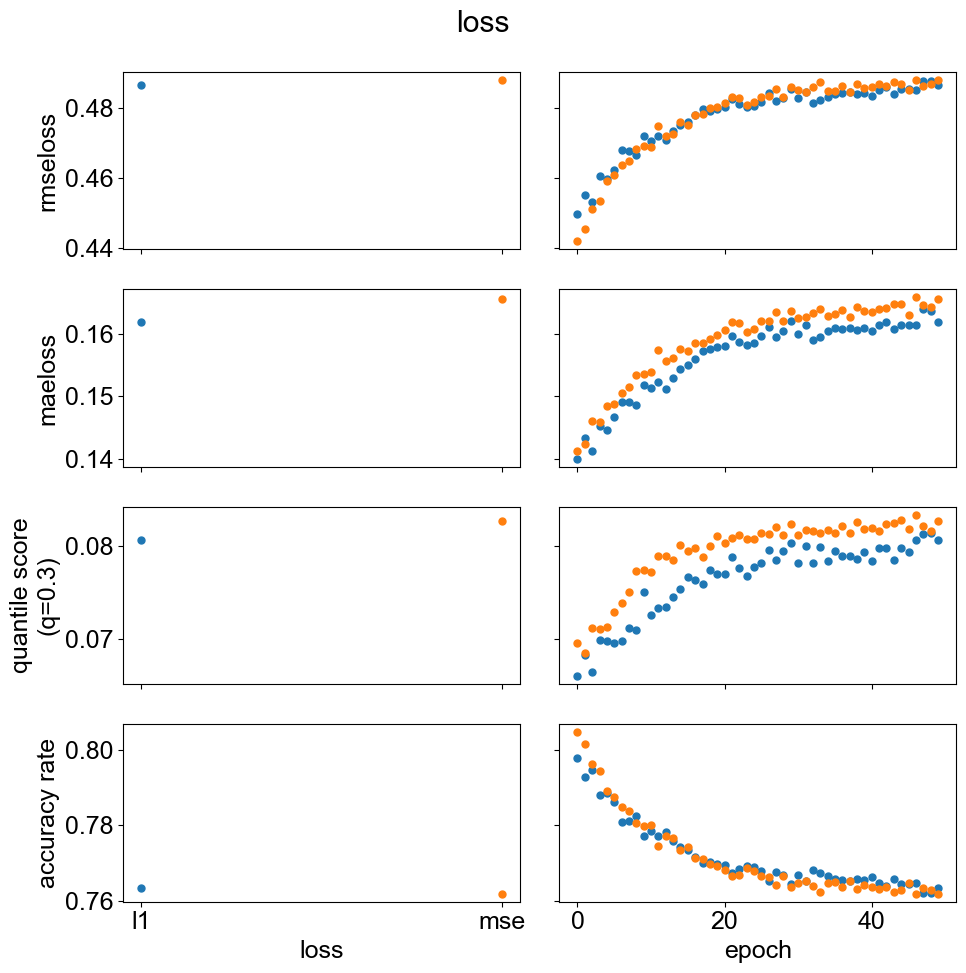

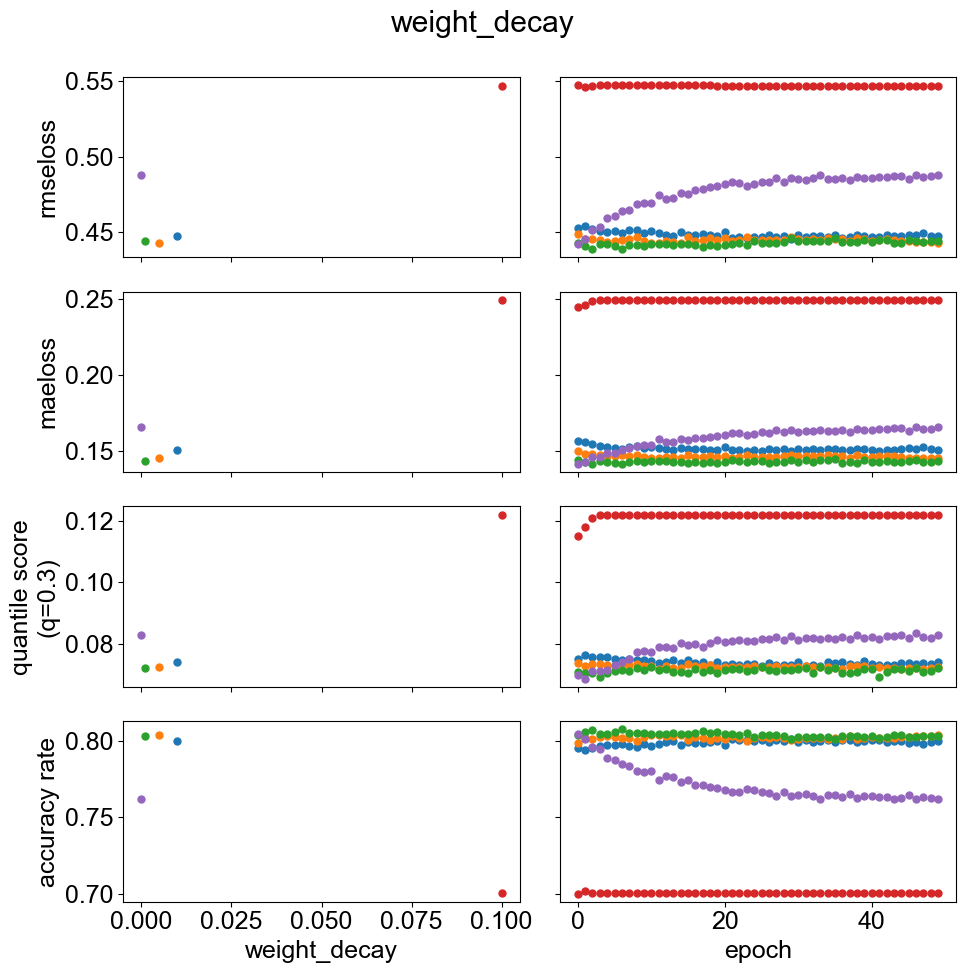

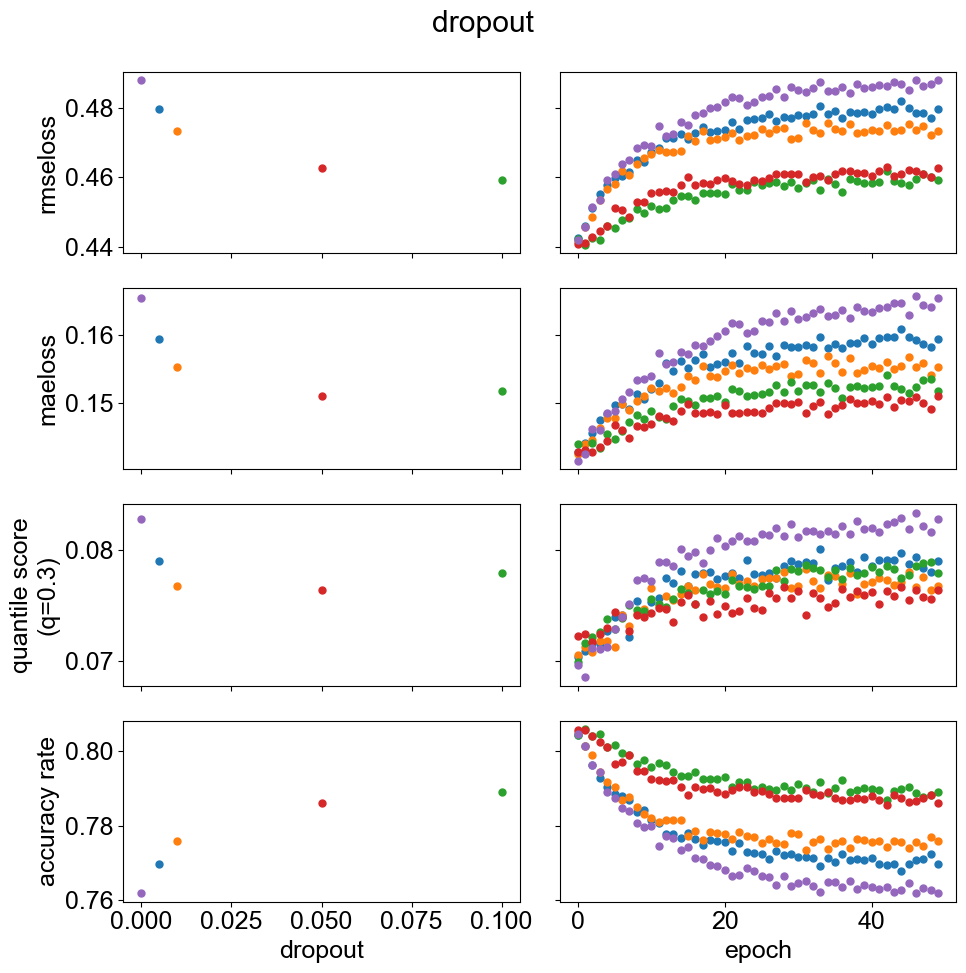

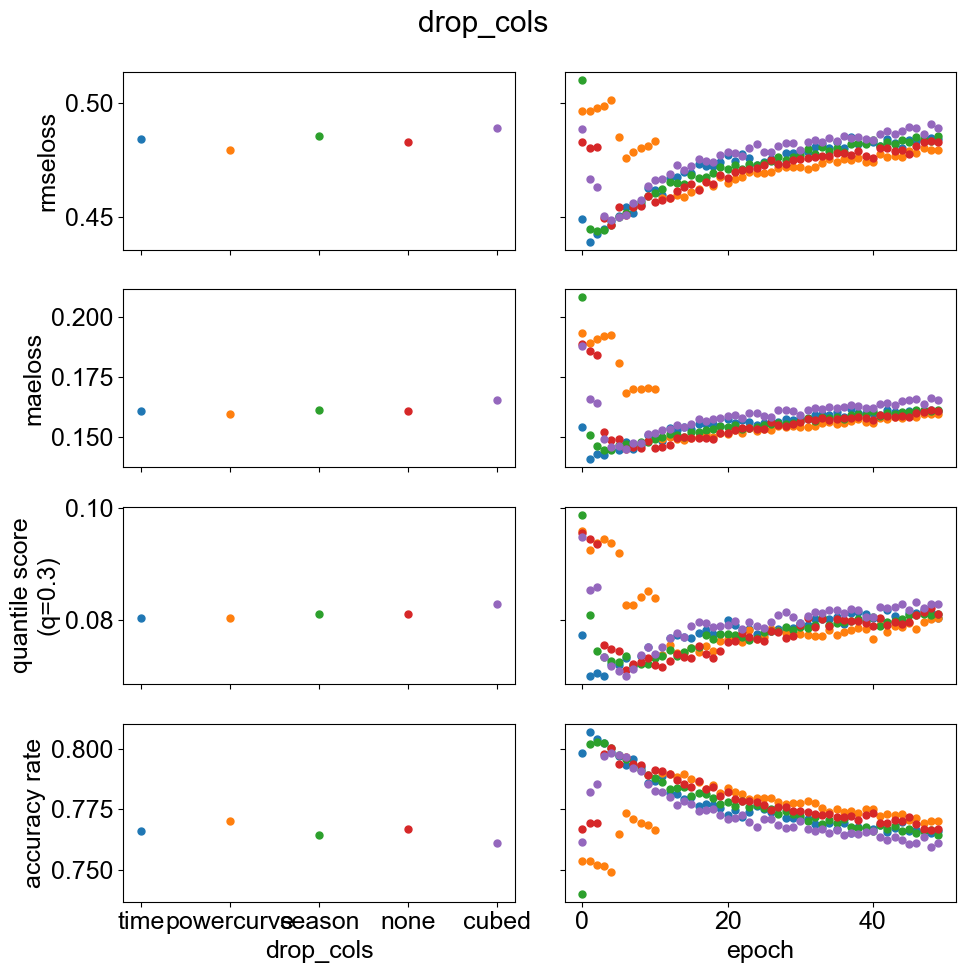

{'type': 'ffnn', 'train': array([0.0456562 , 0.03717108, 0.03668037, 0.03641055, 0.03625248,
       0.0361639 , 0.03606858, 0.03602727, 0.03593911, 0.03586874,
       0.03581753, 0.03581065, 0.03577103, 0.03579274, 0.03570347,
       0.03571555, 0.0357068 , 0.03569626, 0.0356875 , 0.03565211,
       0.03566254, 0.03566106, 0.03563748, 0.03563395, 0.03563243,
       0.03563899, 0.03558862, 0.03559301, 0.03557029, 0.03556991,
       0.0355579 , 0.03557305, 0.03559115, 0.03557165, 0.03557213,
       0.03556918, 0.0355455 , 0.03555314, 0.03556438, 0.03553242,
       0.0355516 , 0.03553581, 0.03553578, 0.03554406, 0.03555455,
       0.03552254, 0.03551525, 0.03556487, 0.03552336, 0.03551191]), 'rmseloss': array([0.44876552, 0.44541305, 0.4455524 , 0.44457461, 0.44352506,
       0.44405281, 0.44502829, 0.4453084 , 0.44697908, 0.44427391,
       0.442853  , 0.44274385, 0.44386833, 0.44381416, 0.44280646,
       0.44686873, 0.44399805, 0.4447983 , 0.44630859, 0.44478968,
       0.44601213, 0.4

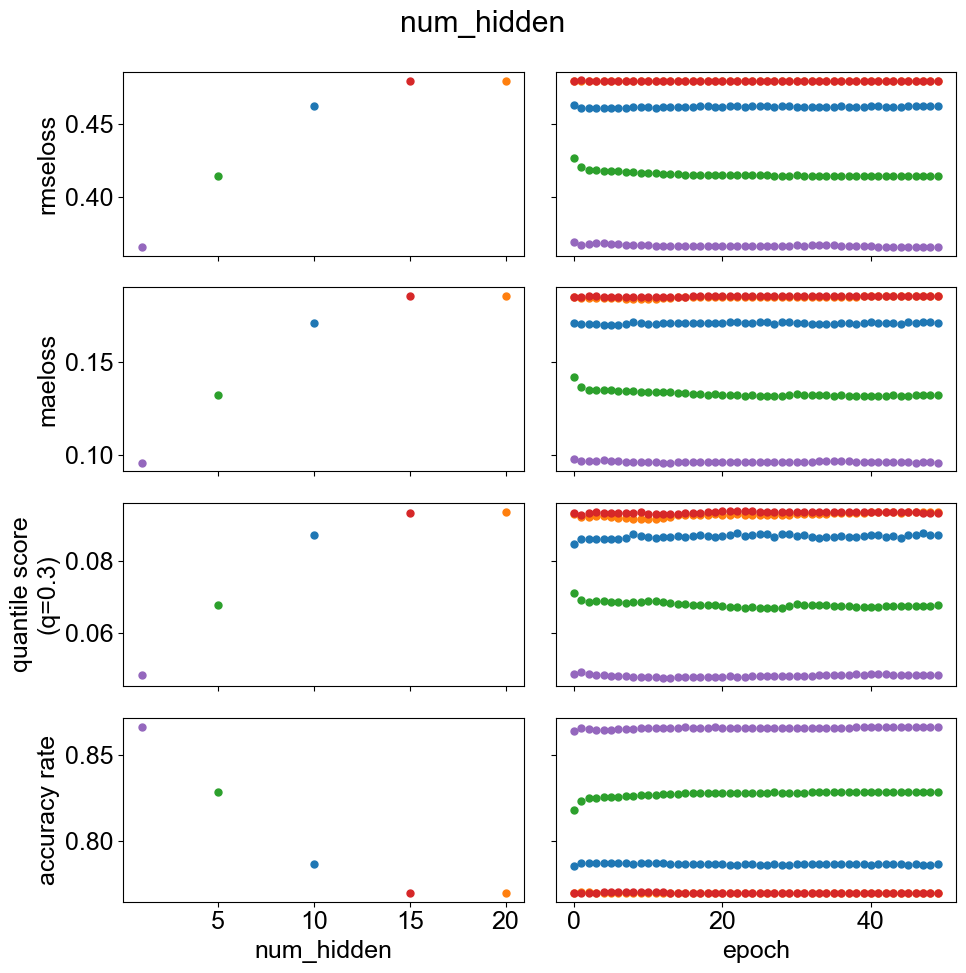

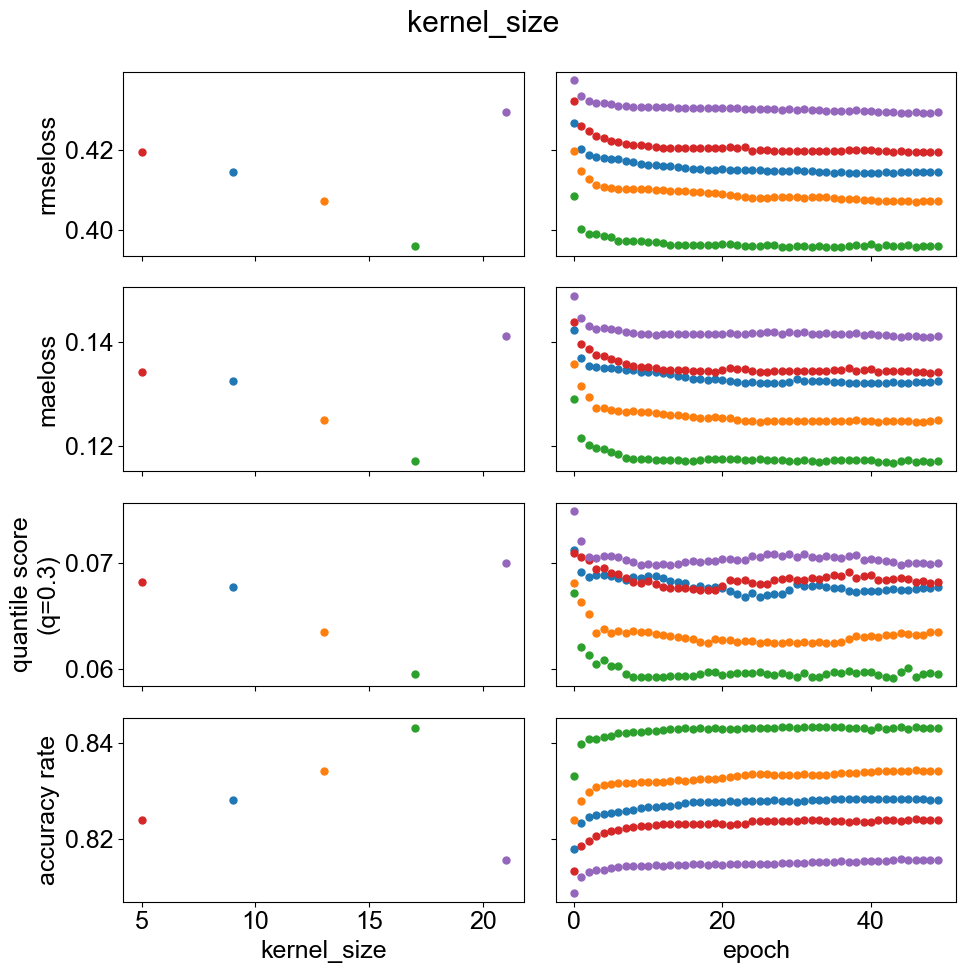

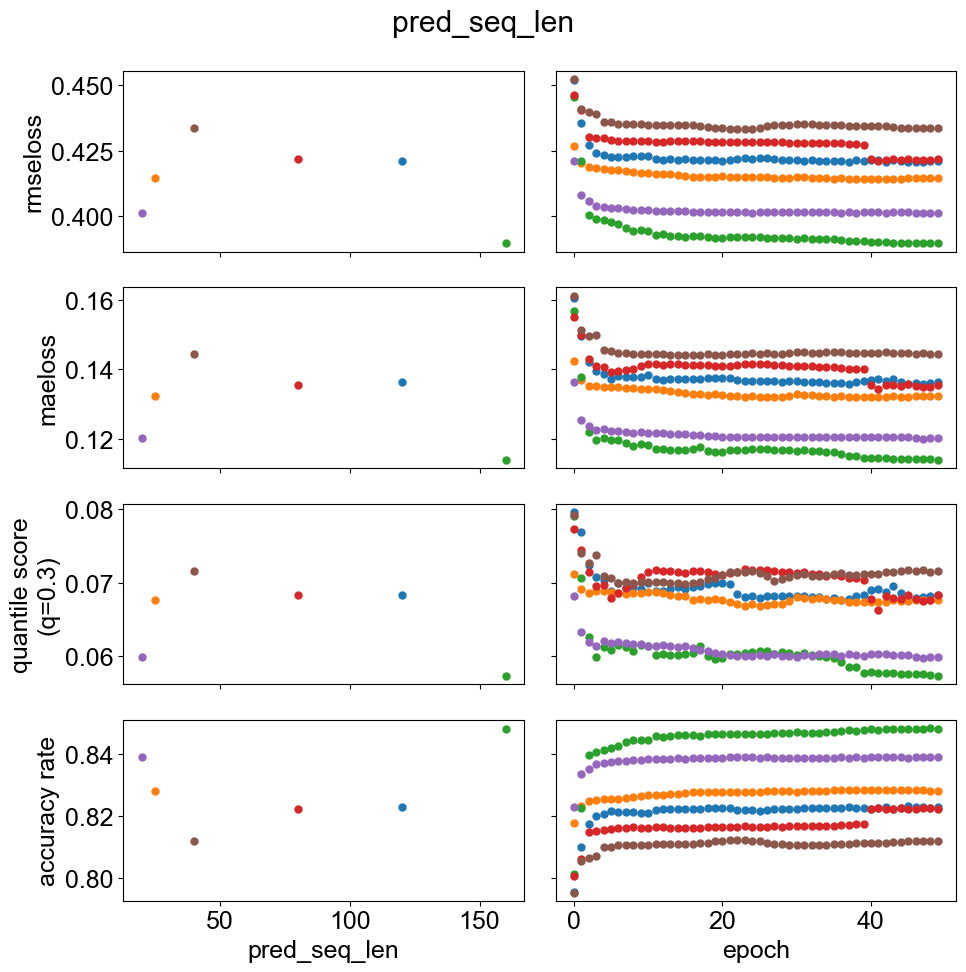

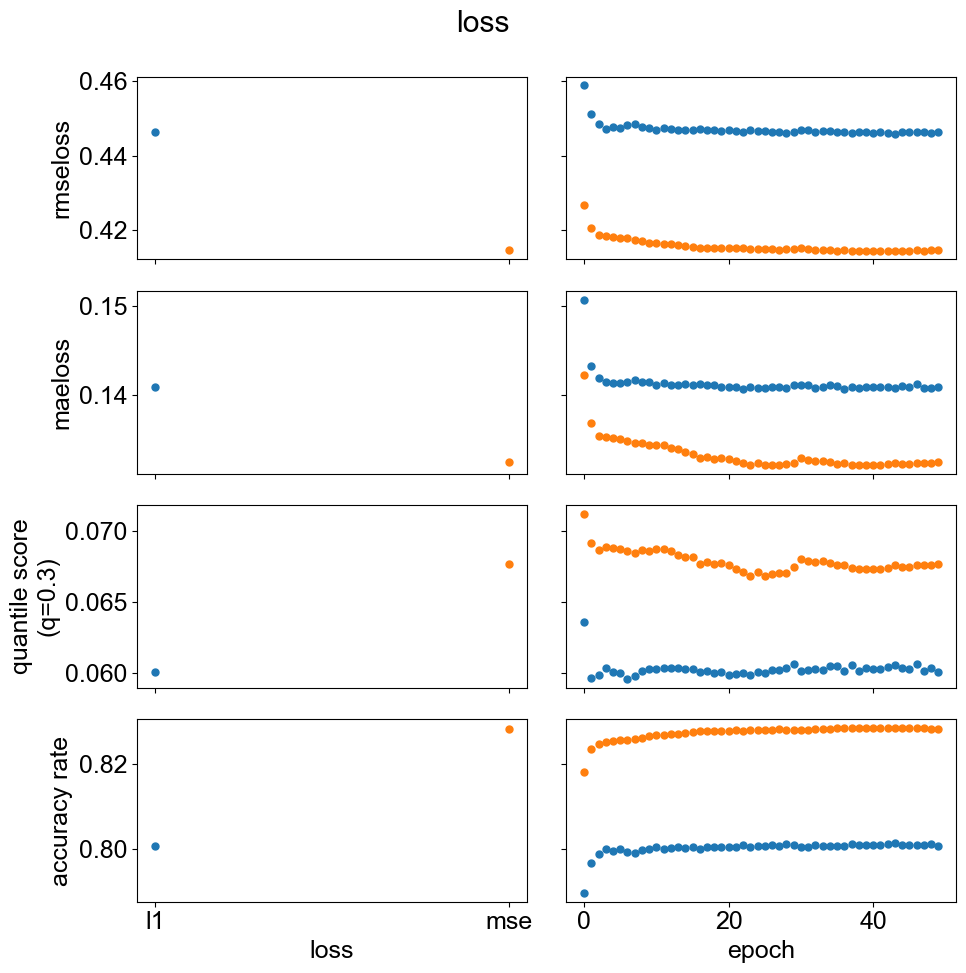

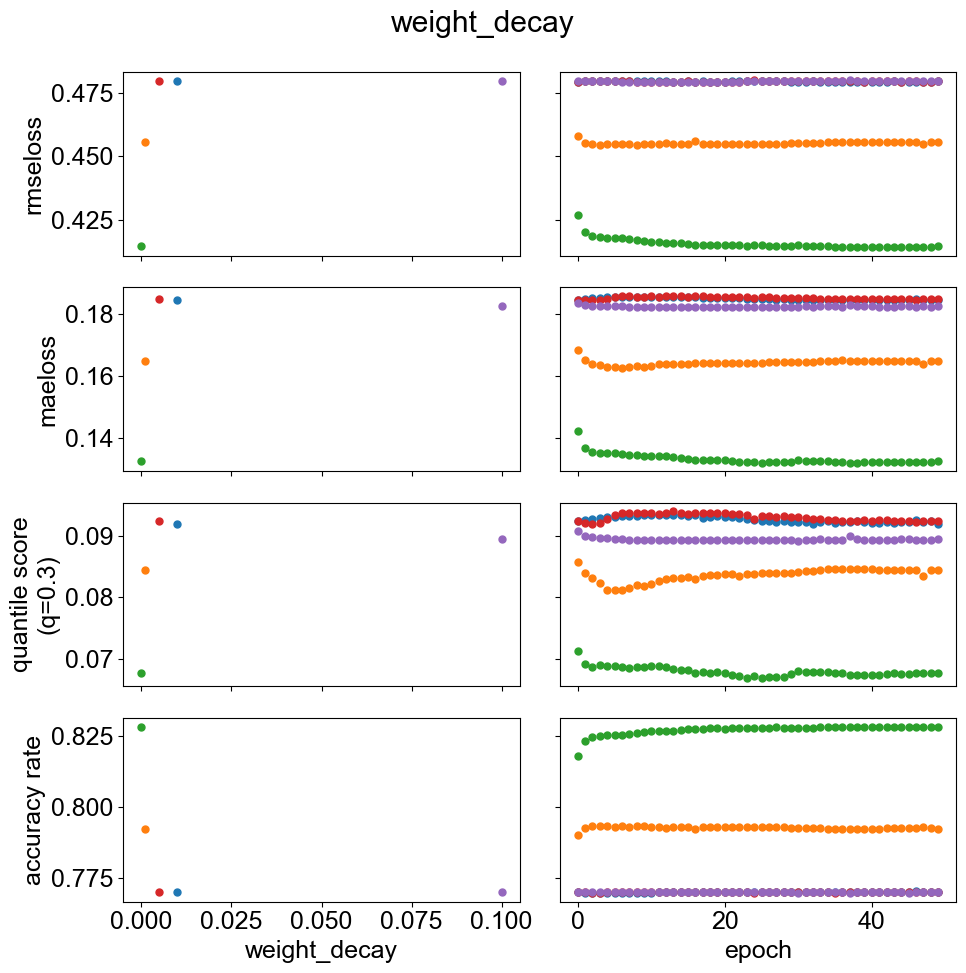

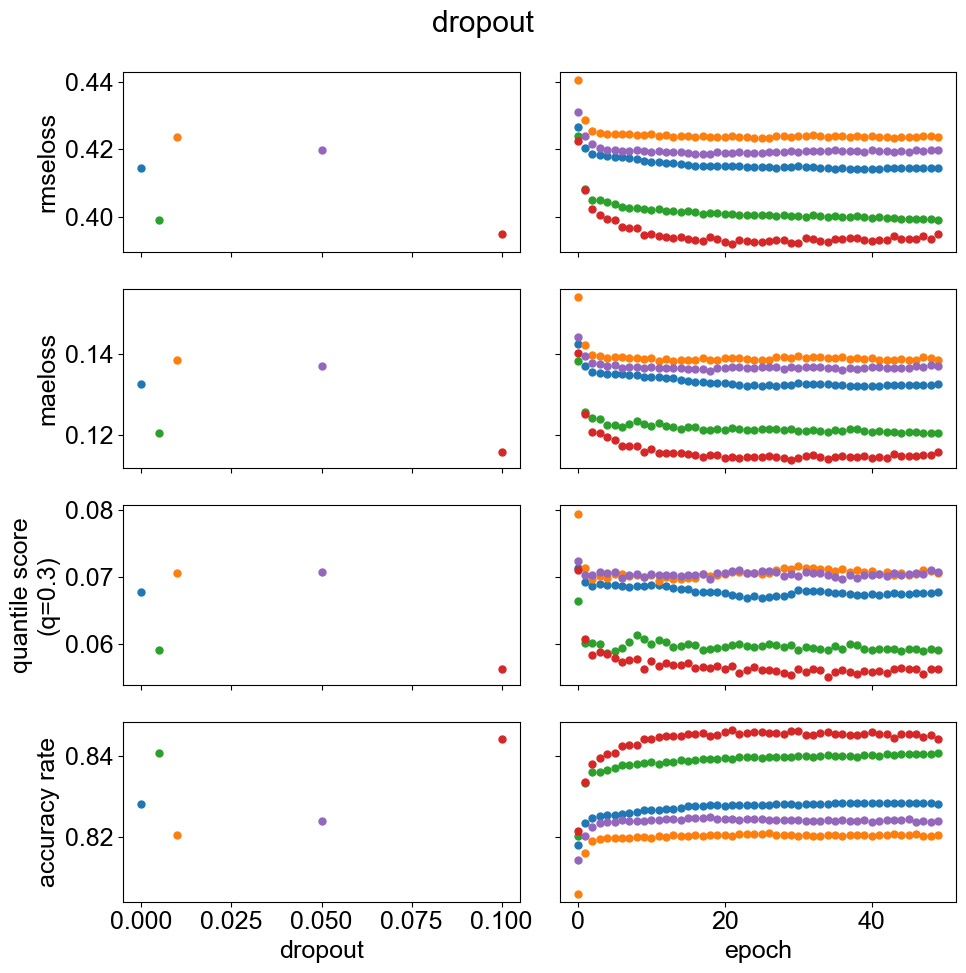

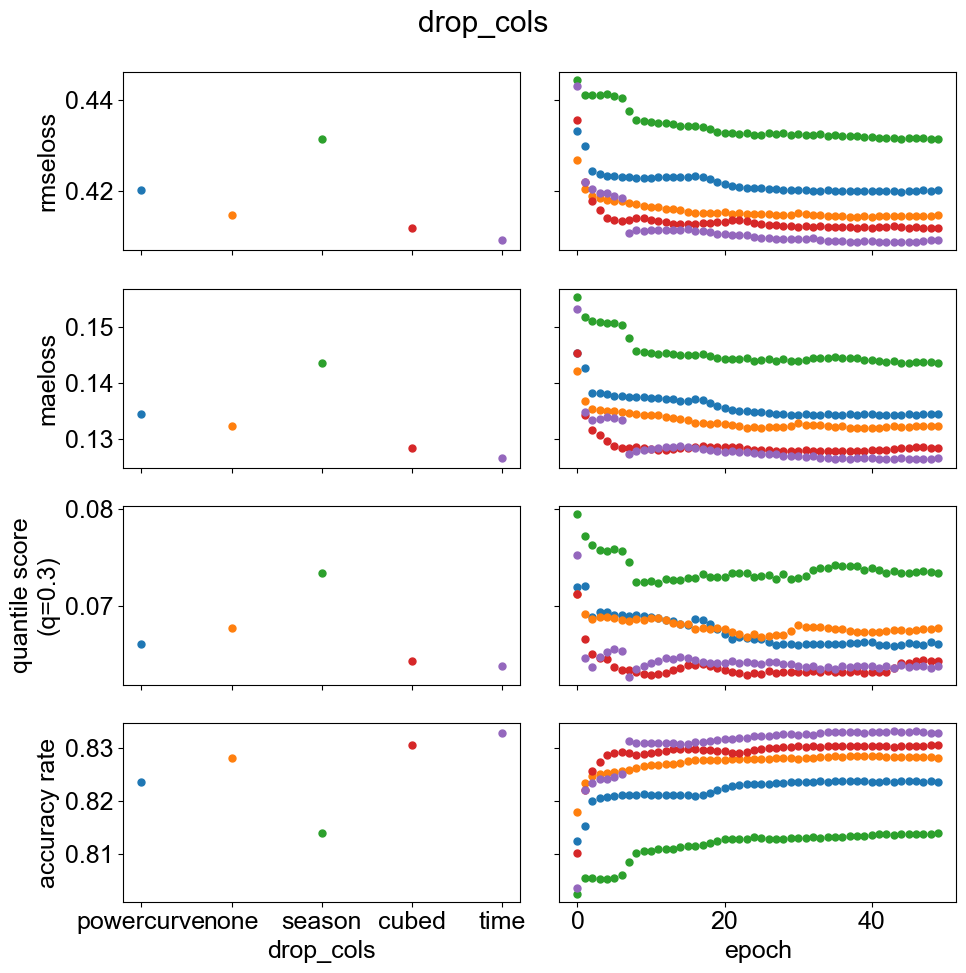

{'type': 'cnn', 'train': array([0.02345859, 0.01806255, 0.01777413, 0.01763669, 0.01756022,
       0.01750426, 0.01745738, 0.01741883, 0.01738823, 0.01736402,
       0.01734017, 0.01731807, 0.01729702, 0.01728026, 0.01726885,
       0.01725896, 0.01724436, 0.01722852, 0.01721329, 0.01719836,
       0.01718636, 0.0171743 , 0.01716631, 0.01715409, 0.01714537,
       0.01713547, 0.01712583, 0.01711795, 0.01710802, 0.01709793,
       0.0170899 , 0.01708026, 0.01707401, 0.0170685 , 0.01706449,
       0.01706185, 0.01705367, 0.01705108, 0.01704969, 0.01704424,
       0.01703914, 0.01703304, 0.01702589, 0.01701974, 0.01701134,
       0.0170055 , 0.01700154, 0.01699737, 0.01699252, 0.01698718]), 'rmseloss': array([0.36961579, 0.36707989, 0.36812522, 0.36848784, 0.36851639,
       0.36821095, 0.36787499, 0.36759711, 0.36742775, 0.36728996,
       0.3671412 , 0.36689064, 0.36672721, 0.36664595, 0.36662126,
       0.36652574, 0.3666237 , 0.36663738, 0.36662932, 0.36656112,
       0.36671965, 0.36

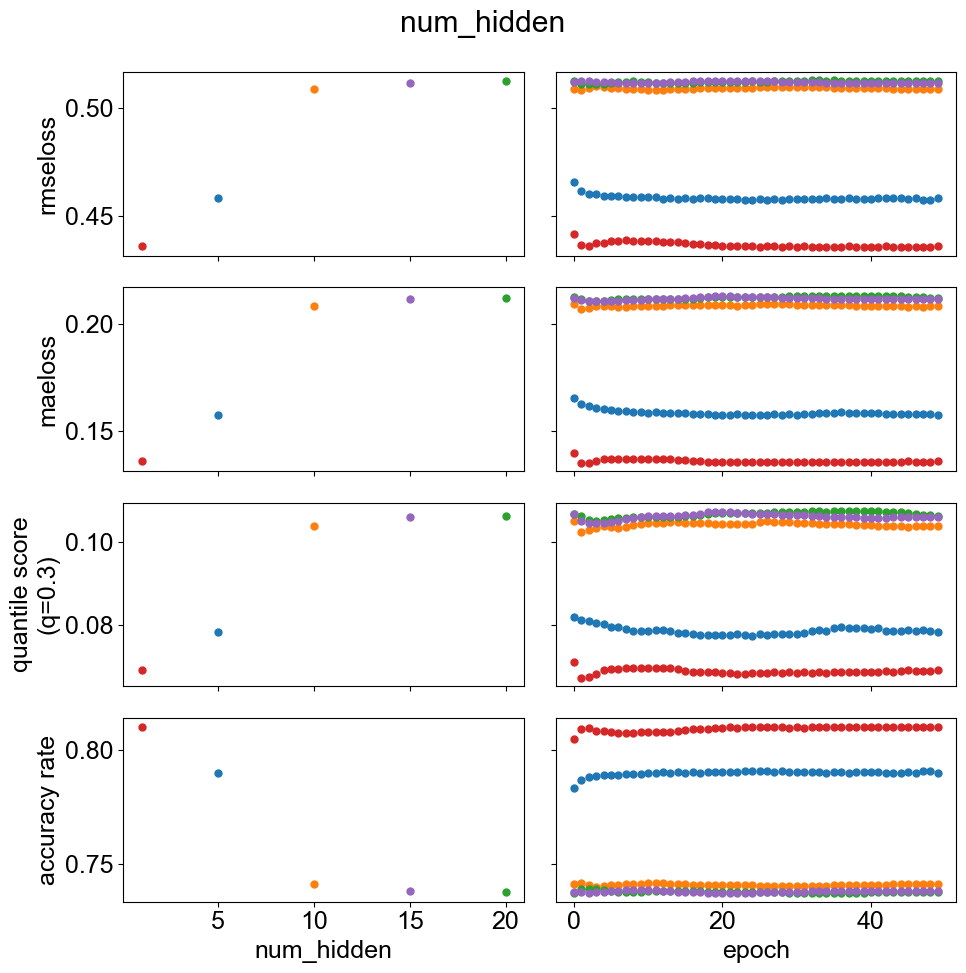

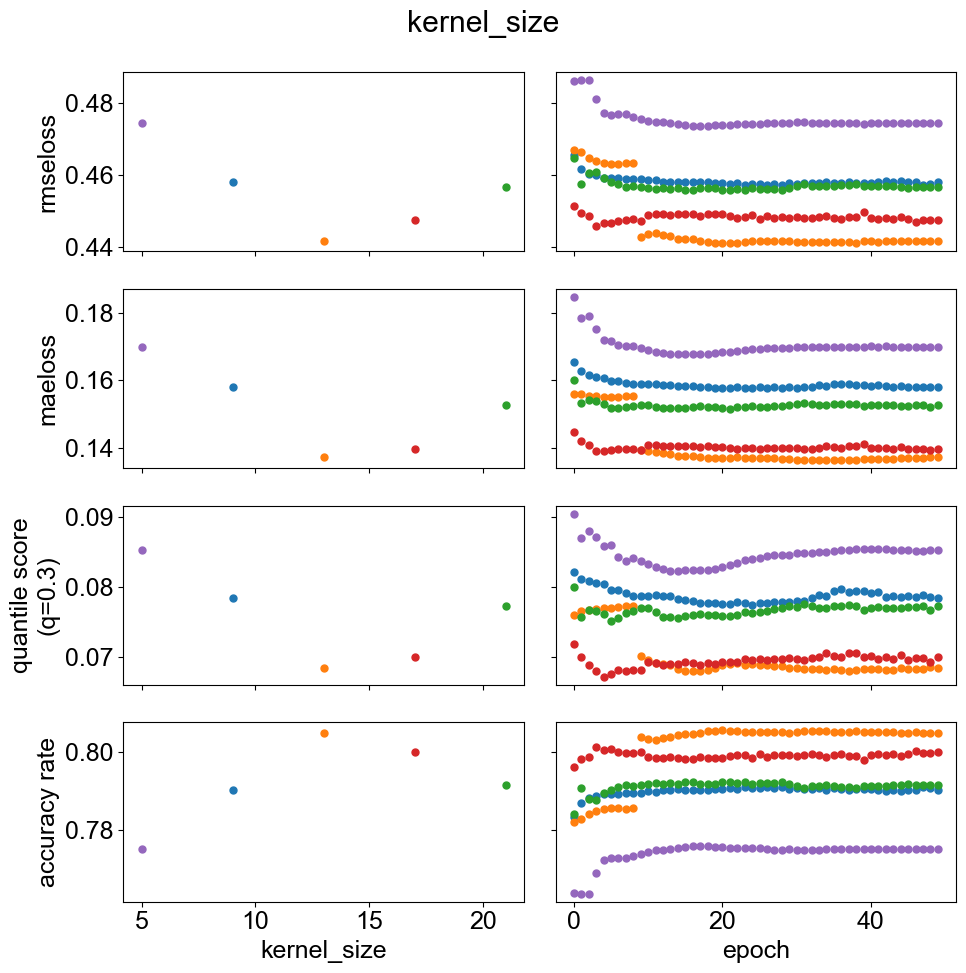

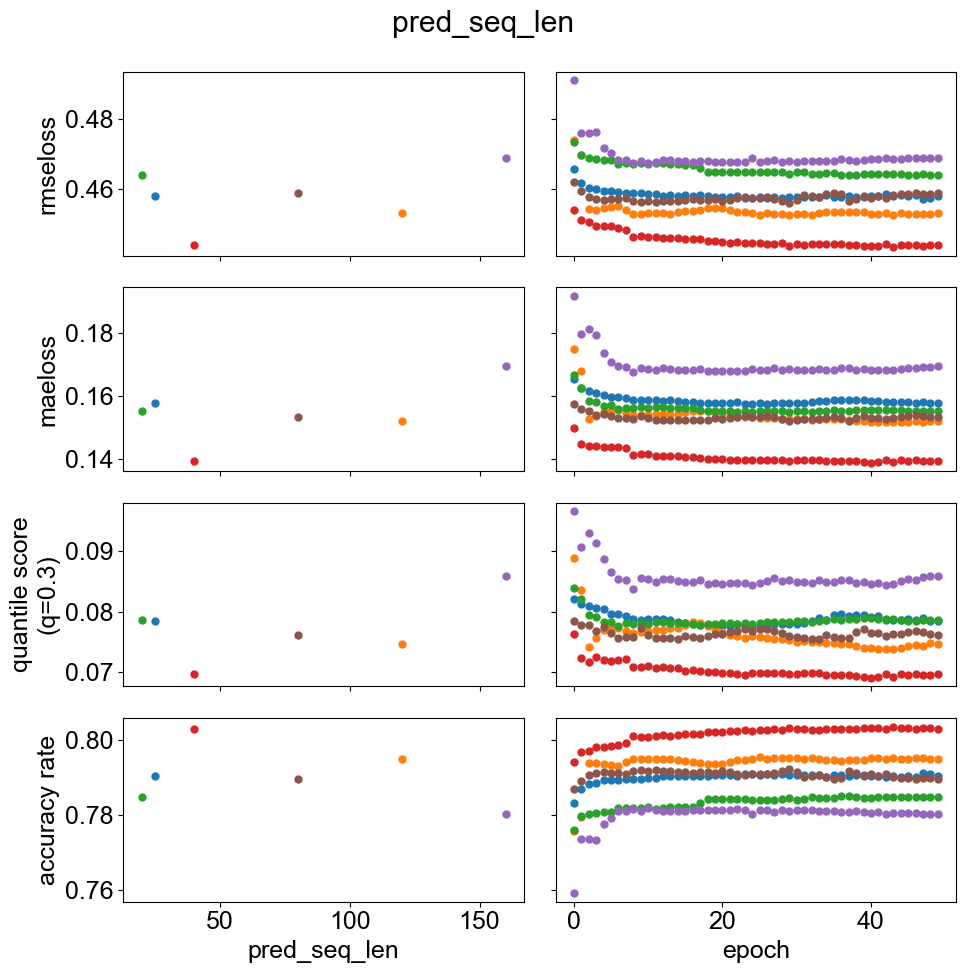

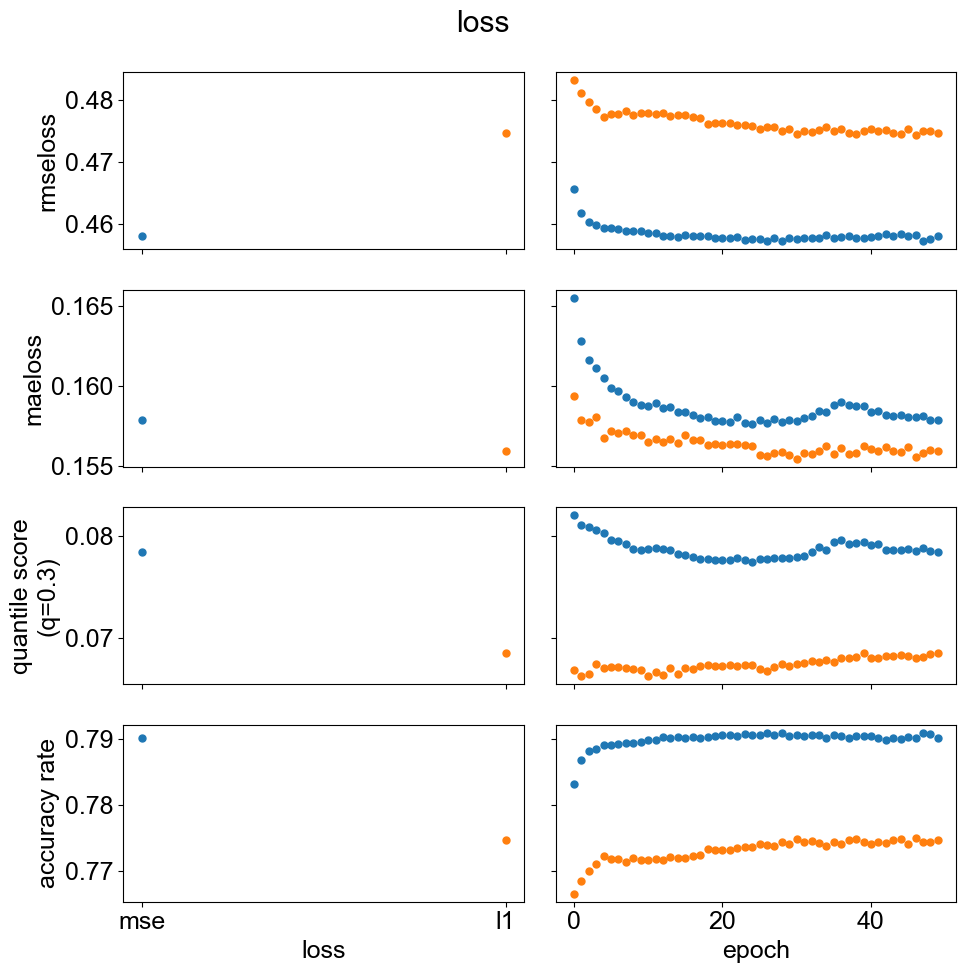

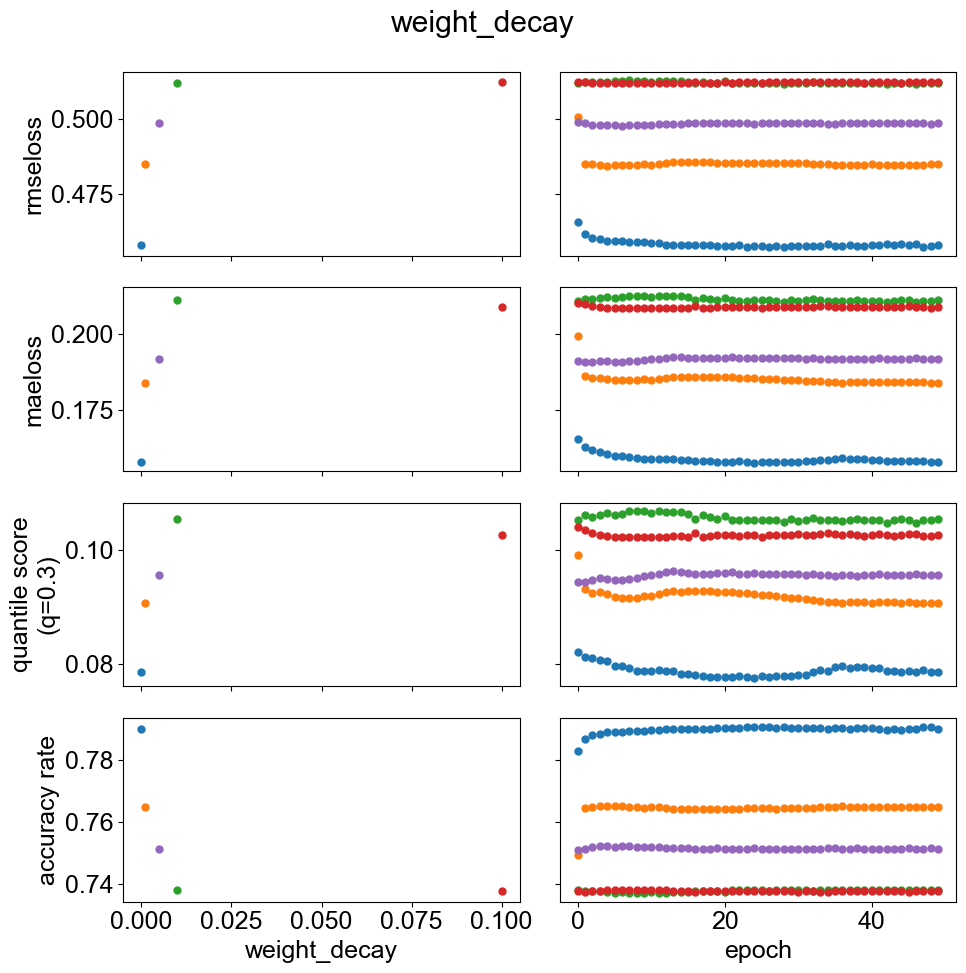

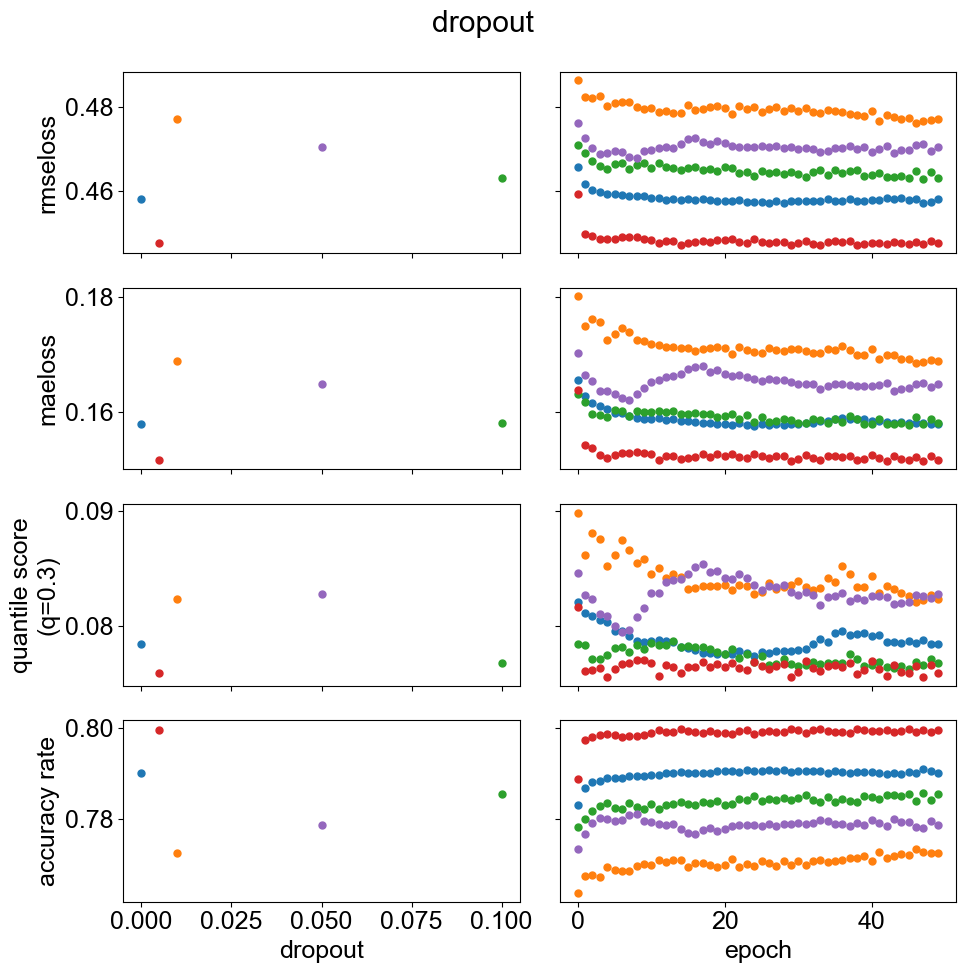

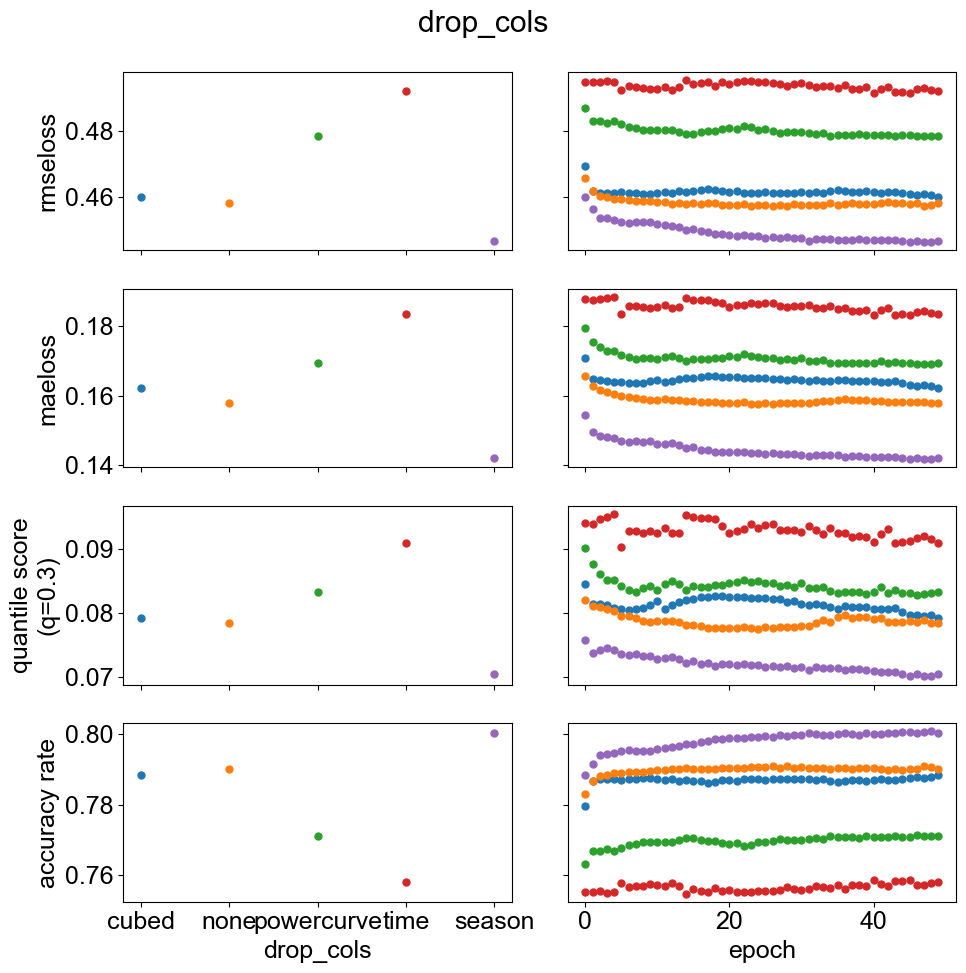

{'type': 'cnn', 'train': array([0.03850658, 0.03447382, 0.03401757, 0.03372446, 0.03351566,
       0.03335229, 0.03324536, 0.0331696 , 0.0331034 , 0.03301634,
       0.03295761, 0.03291086, 0.03287452, 0.03283232, 0.03278106,
       0.03273821, 0.03270557, 0.03268052, 0.03264987, 0.0326185 ,
       0.03259242, 0.0325693 , 0.03255419, 0.03254057, 0.03252249,
       0.03250515, 0.03249468, 0.03248257, 0.03246739, 0.03245303,
       0.03242867, 0.03241281, 0.03240434, 0.03238718, 0.03237859,
       0.032363  , 0.03235361, 0.03234315, 0.03233354, 0.03231461,
       0.03230672, 0.03228892, 0.03227945, 0.03228098, 0.03226302,
       0.03225245, 0.03224912, 0.03223565, 0.0322231 , 0.03222352]), 'rmseloss': array([0.44151001, 0.43653085, 0.43597345, 0.43743254, 0.43746031,
       0.43836498, 0.43843907, 0.43856225, 0.43842435, 0.43833014,
       0.43824101, 0.43814391, 0.43800061, 0.4379731 , 0.43758318,
       0.4373751 , 0.43677952, 0.43675565, 0.43645384, 0.43631236,
       0.43589575, 0.43

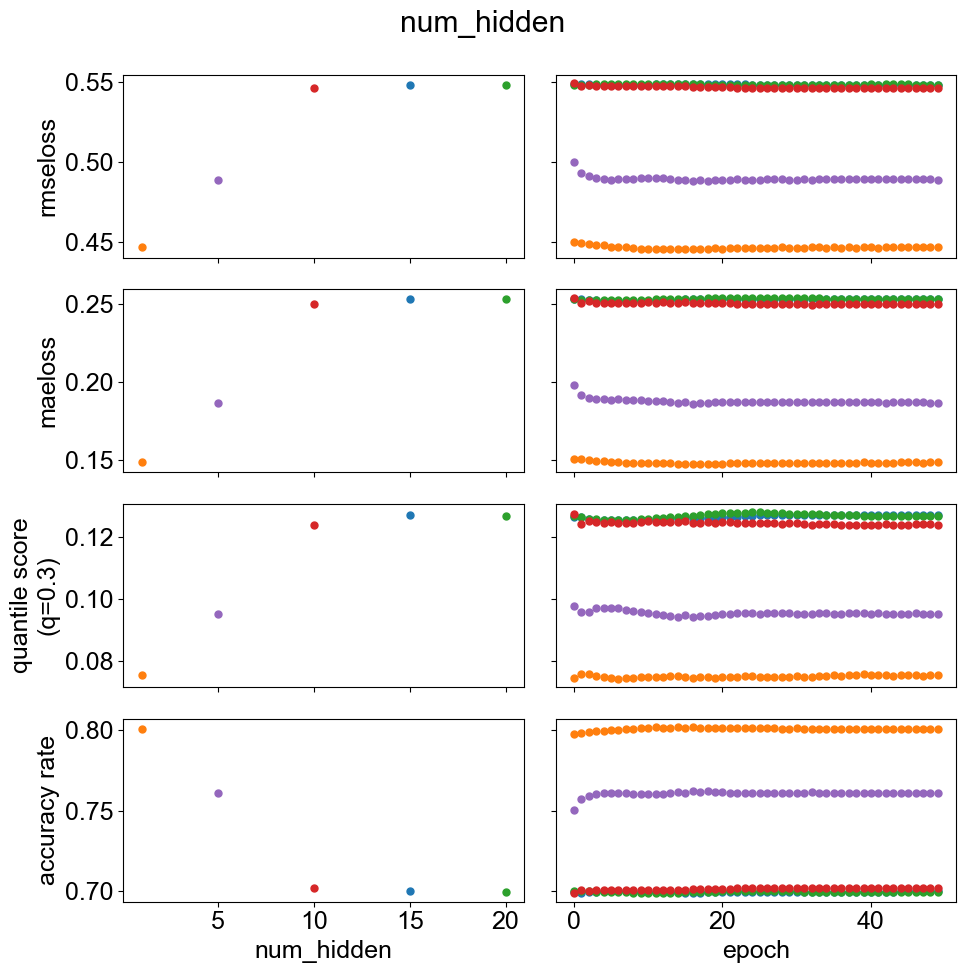

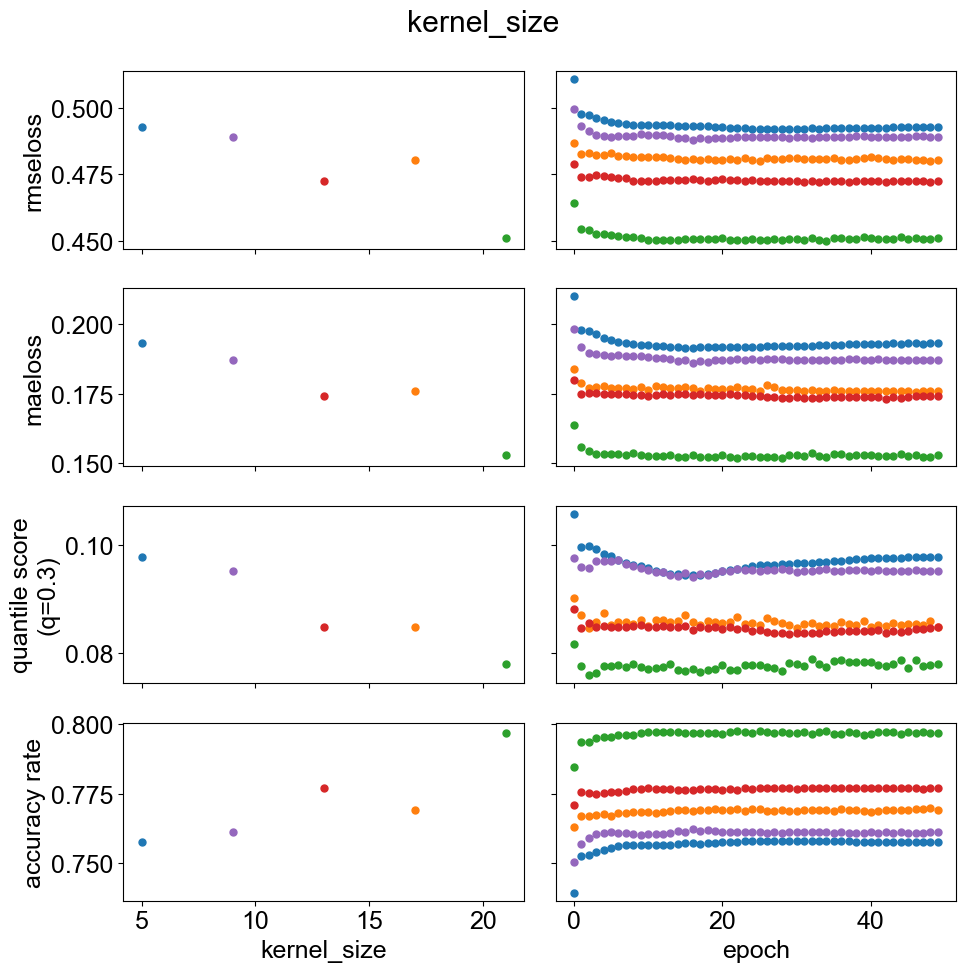

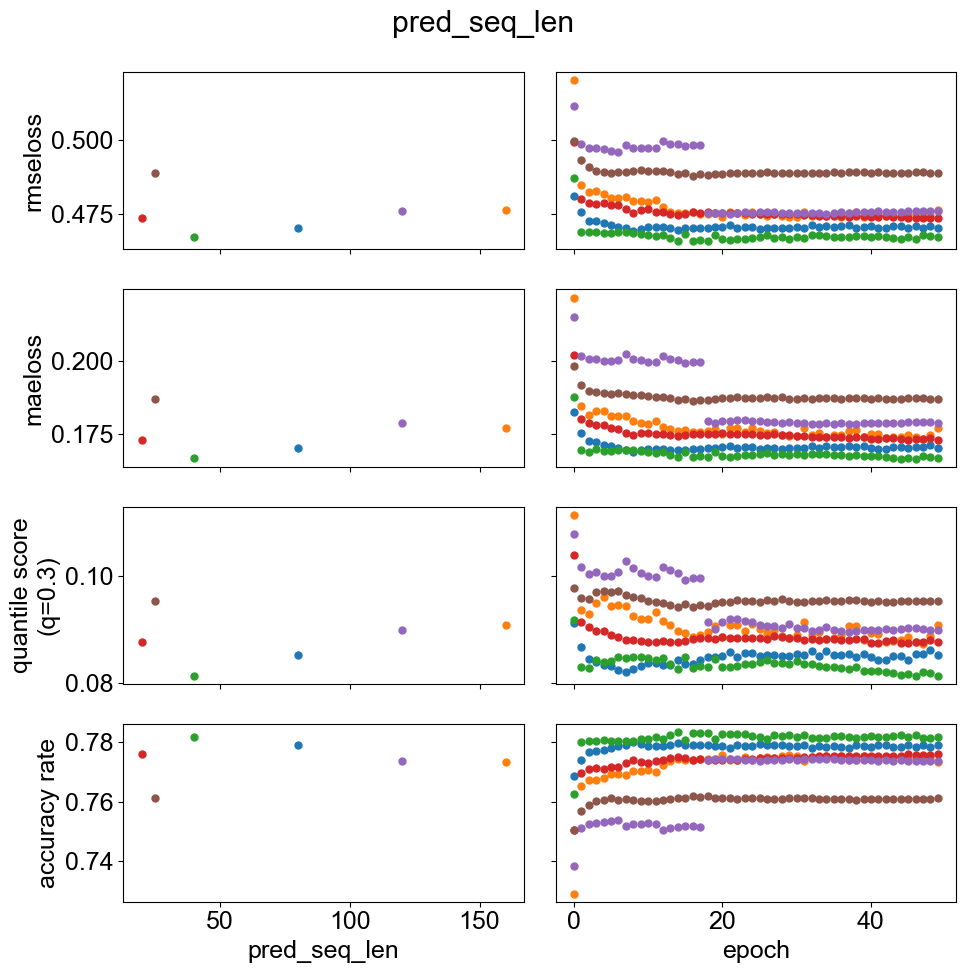

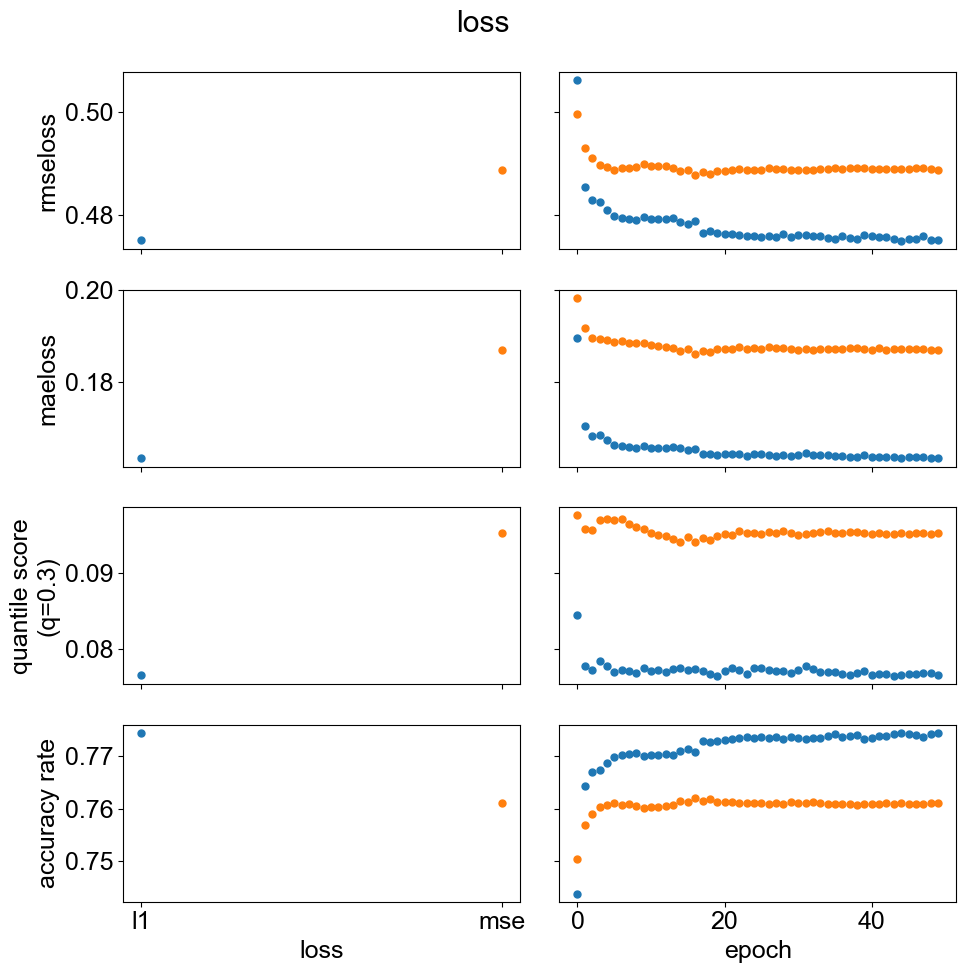

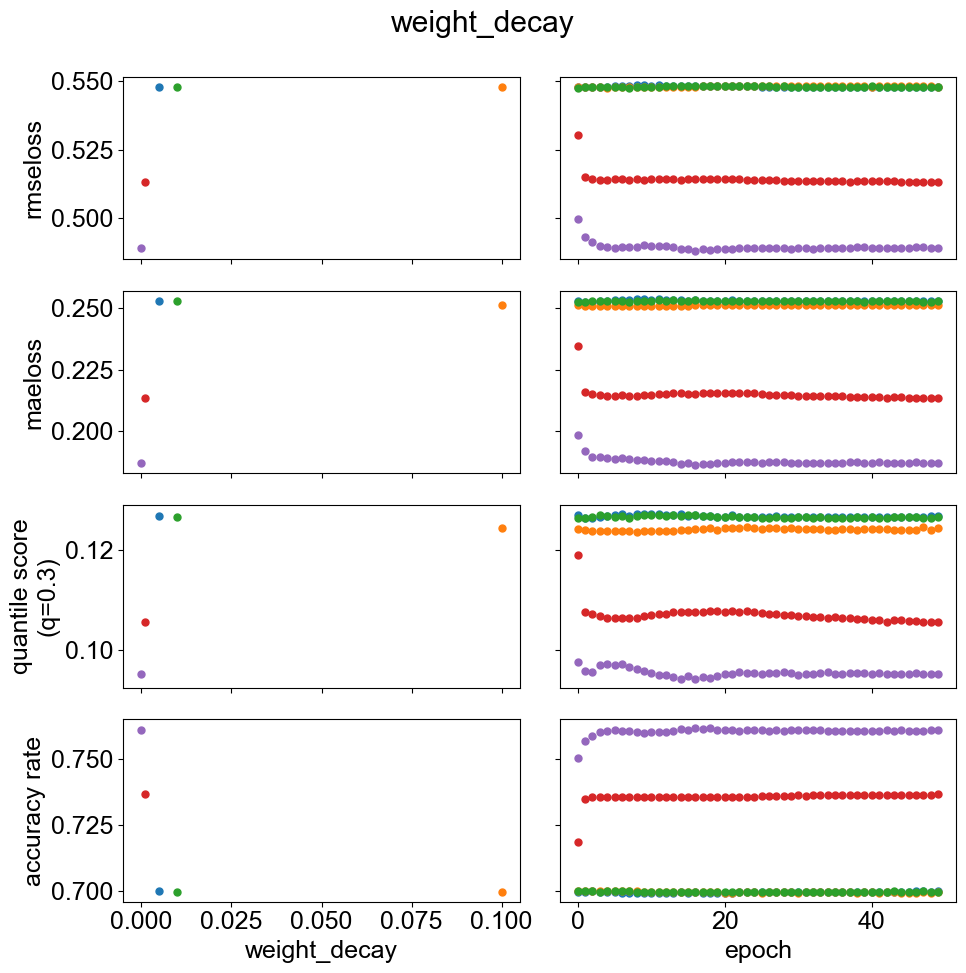

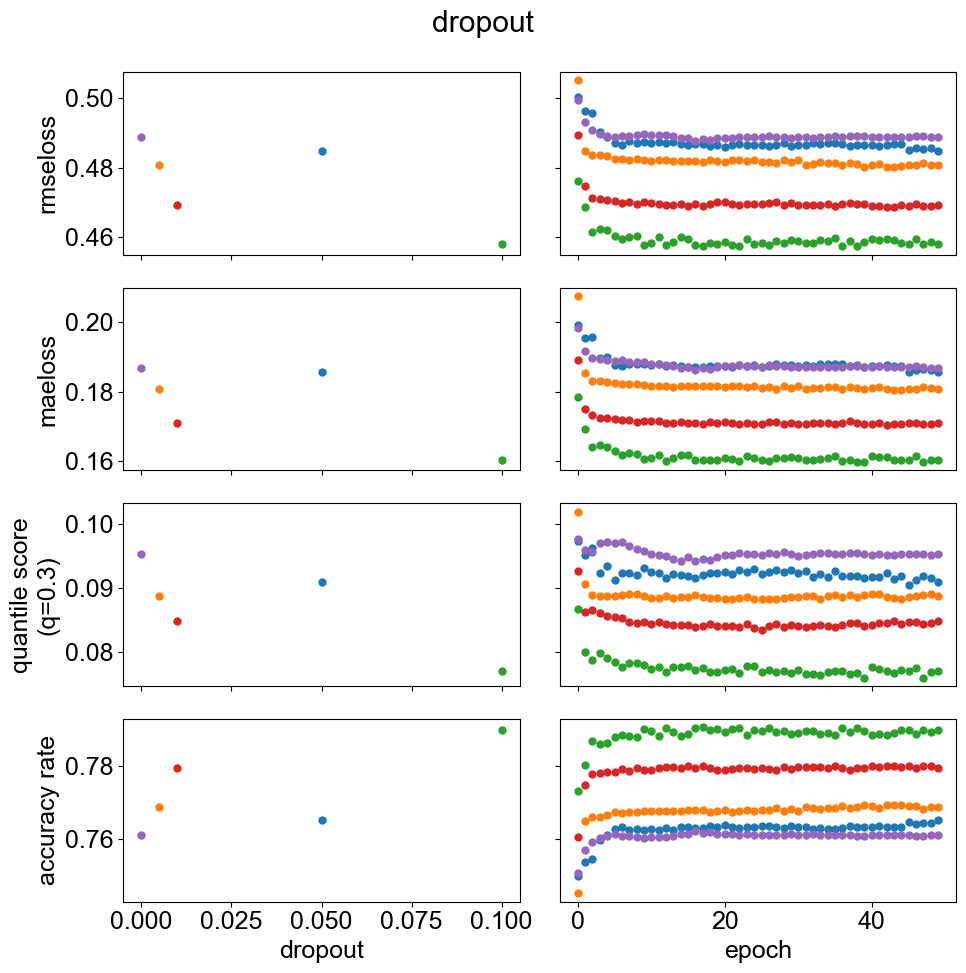

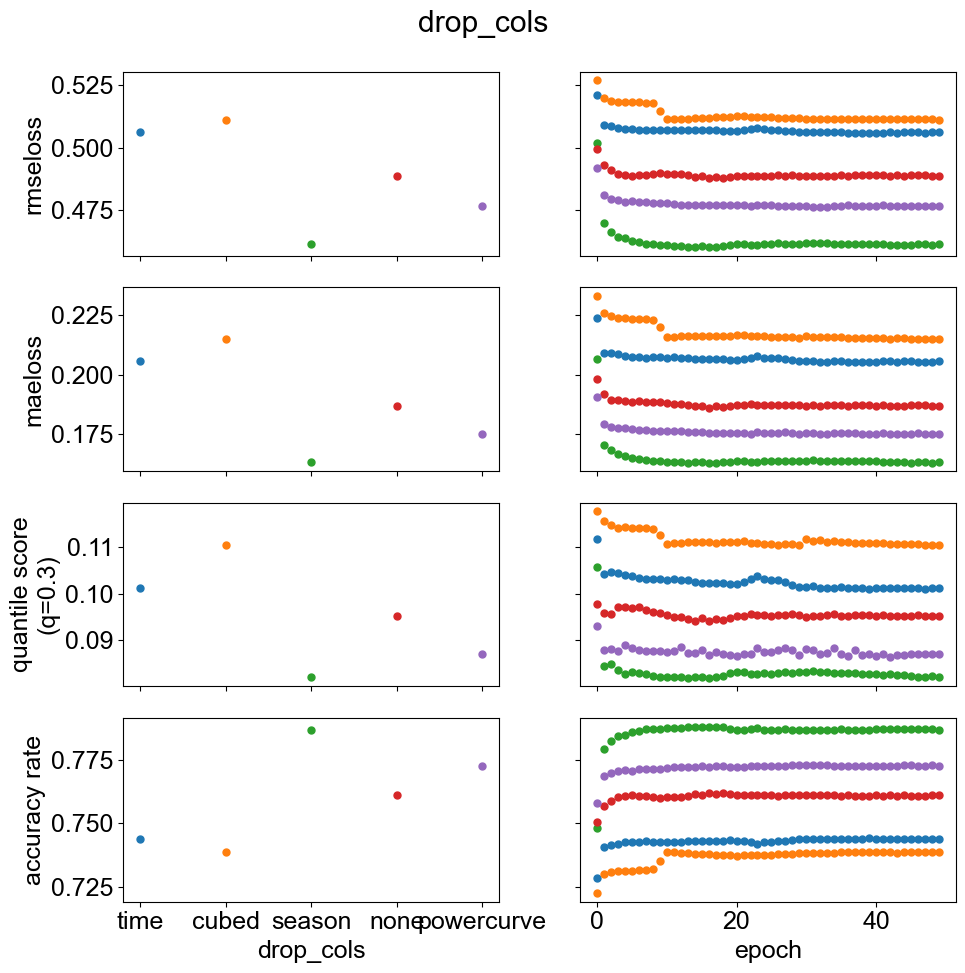

{'type': 'cnn', 'train': array([0.04759012, 0.03819579, 0.0374912 , 0.03712582, 0.03690911,
       0.03676869, 0.0366669 , 0.03656232, 0.03647997, 0.03640582,
       0.03635319, 0.0363046 , 0.0362641 , 0.03623057, 0.03619172,
       0.03616254, 0.03612978, 0.0360938 , 0.03606035, 0.03603459,
       0.03600829, 0.03598769, 0.03596193, 0.03594331, 0.03592526,
       0.03590962, 0.03589003, 0.03587613, 0.03586195, 0.03585392,
       0.03584361, 0.03582526, 0.03581062, 0.03580588, 0.03579183,
       0.03578468, 0.03576817, 0.03575443, 0.035746  , 0.0357303 ,
       0.03572541, 0.03570447, 0.03569517, 0.03568654, 0.03568723,
       0.03567386, 0.0356608 , 0.03564641, 0.03564175, 0.03563633]), 'rmseloss': array([0.45004134, 0.4490218 , 0.44865704, 0.44817215, 0.44766892,
       0.4468207 , 0.44688196, 0.44664049, 0.44611689, 0.44558416,
       0.44558461, 0.44539965, 0.44546708, 0.44552447, 0.44536307,
       0.4454187 , 0.44519204, 0.4455216 , 0.44544122, 0.44574282,
       0.44563659, 0.44

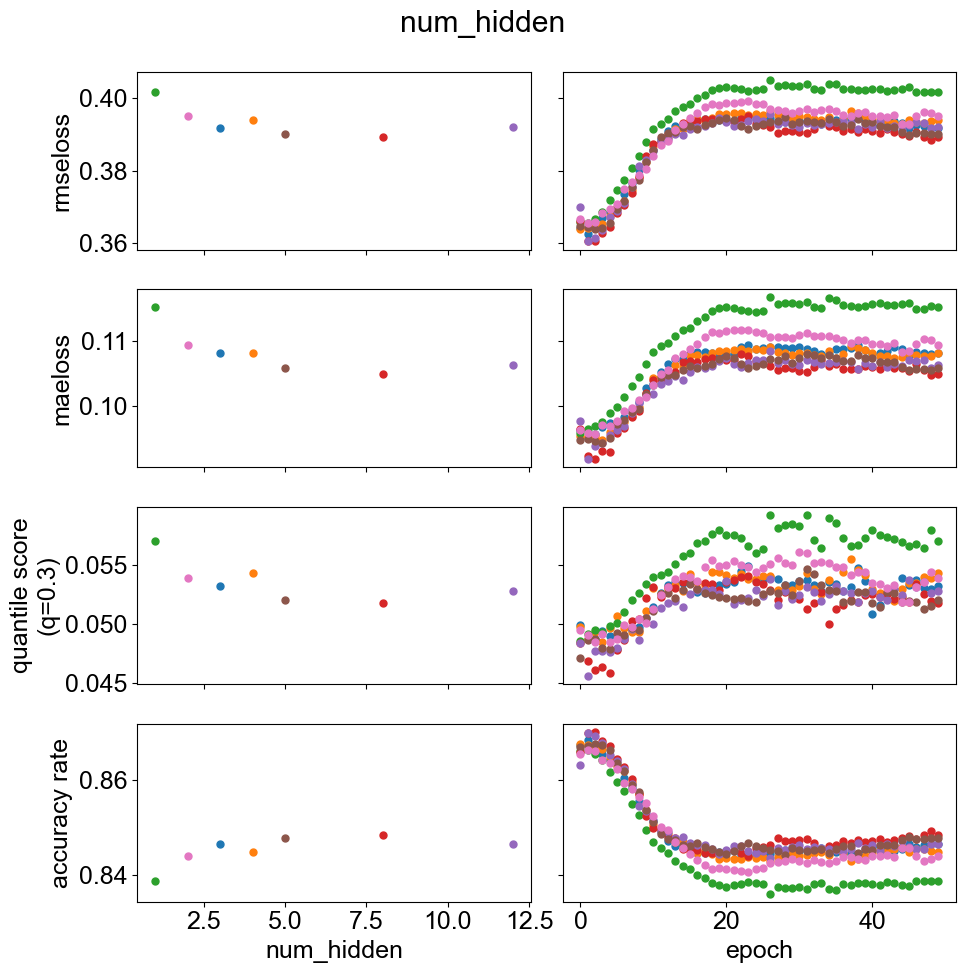

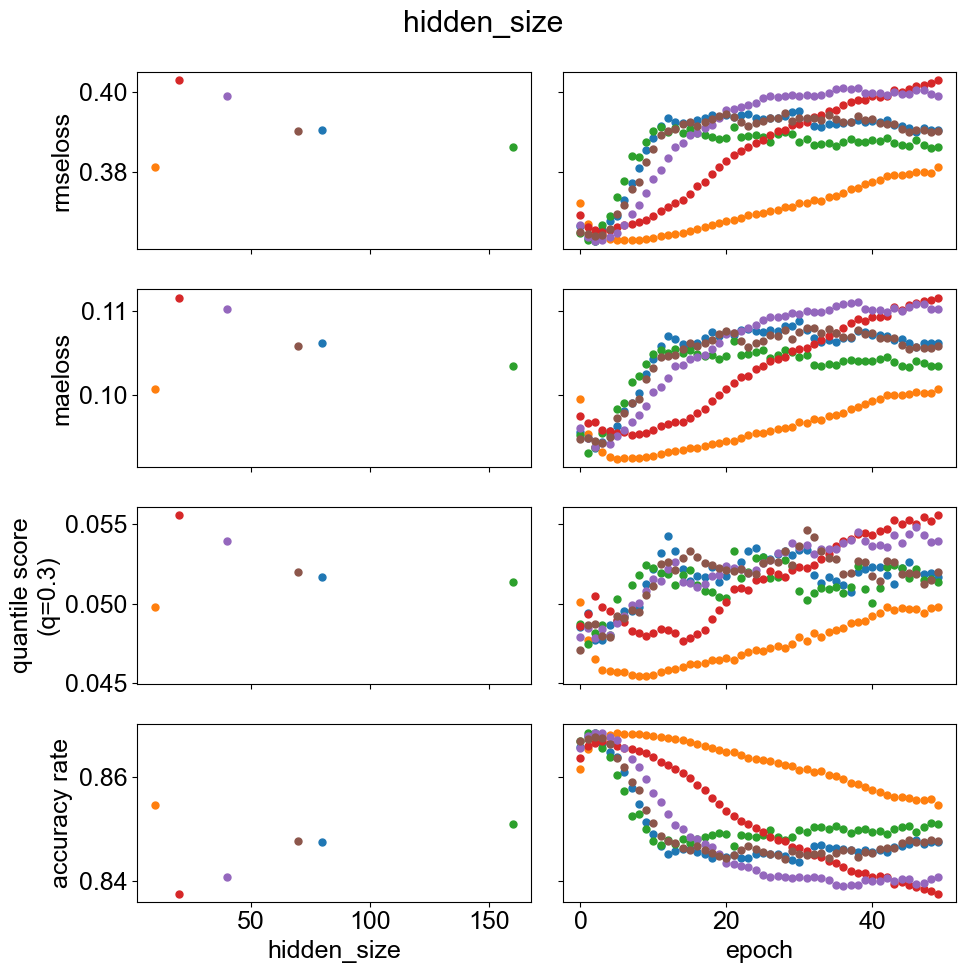

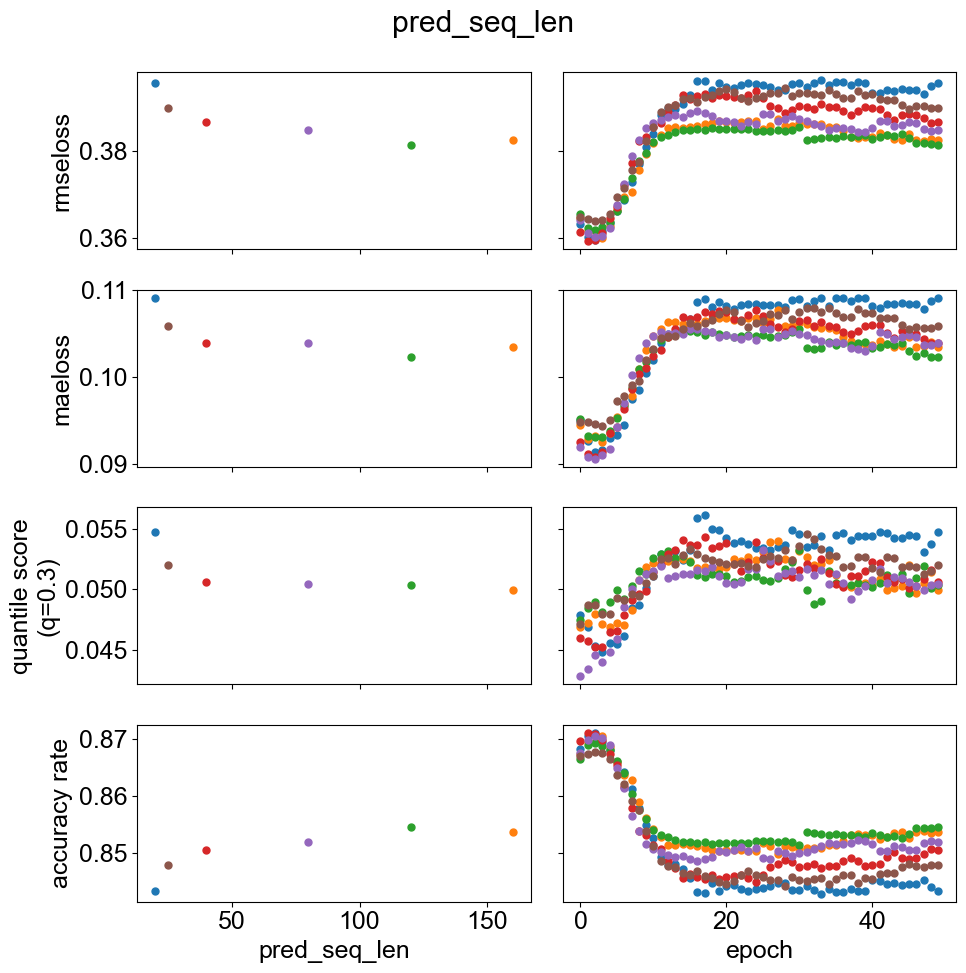

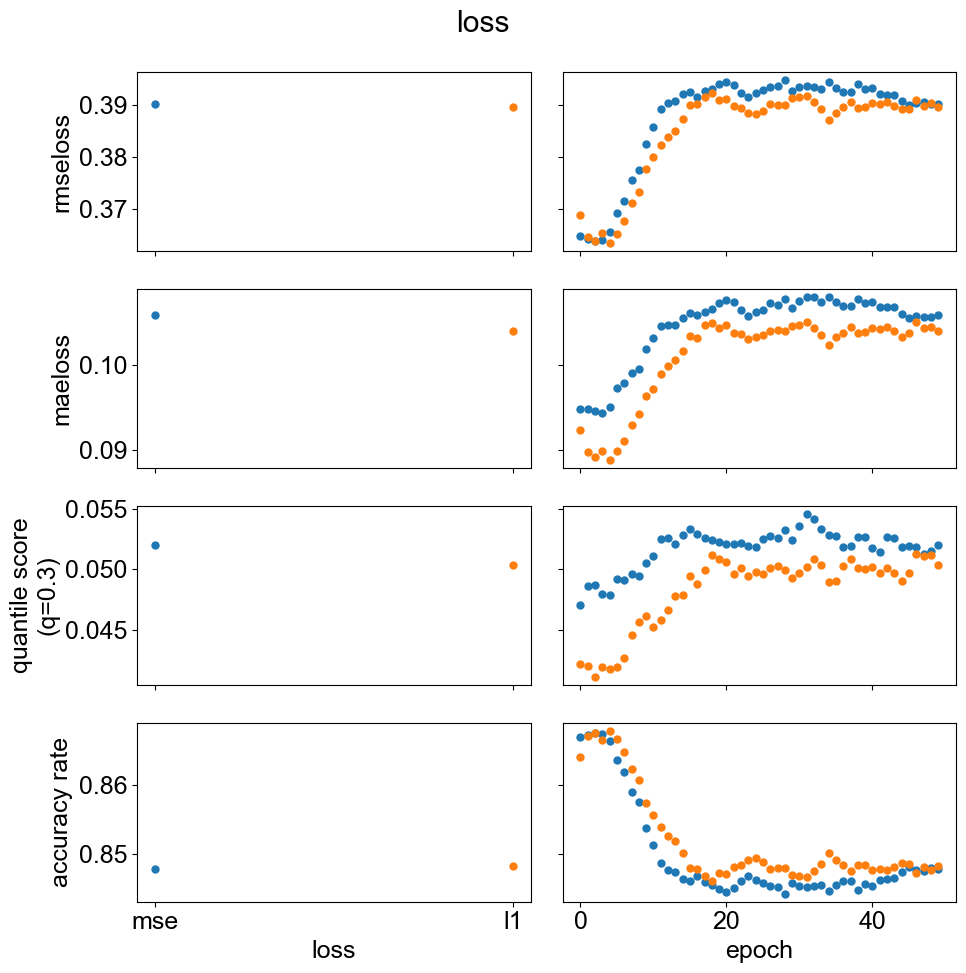

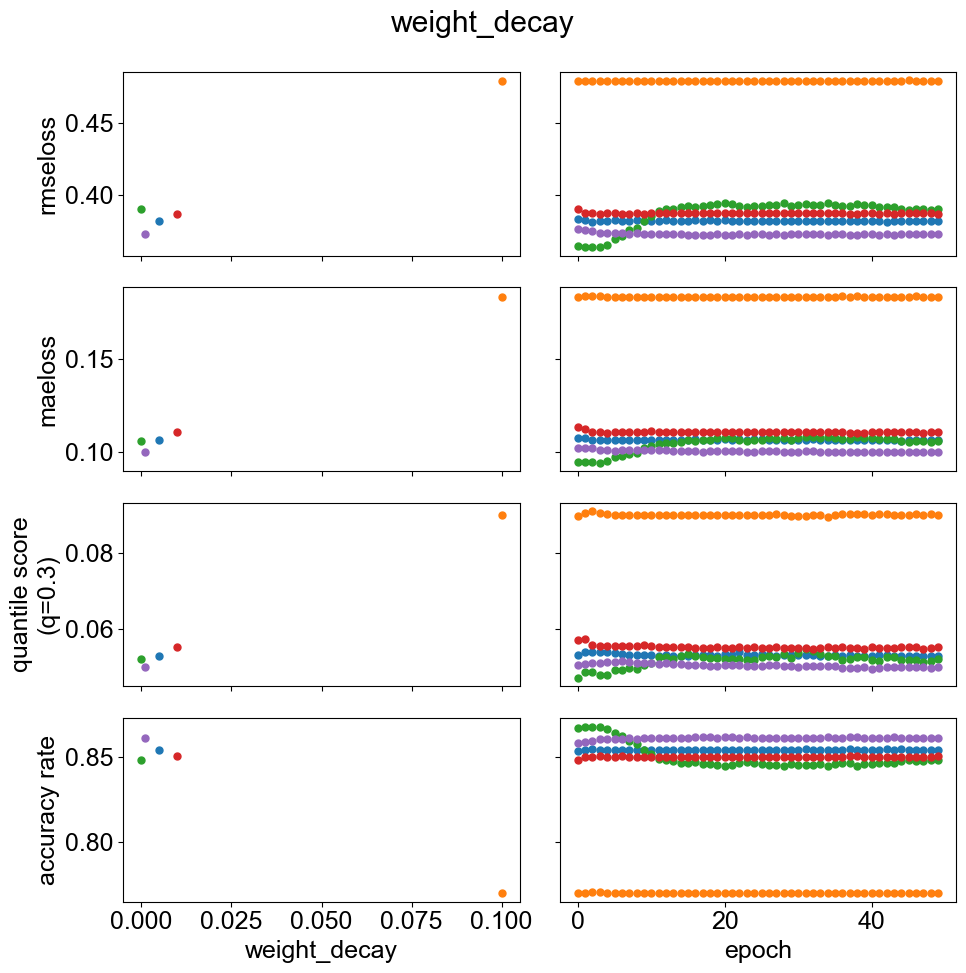

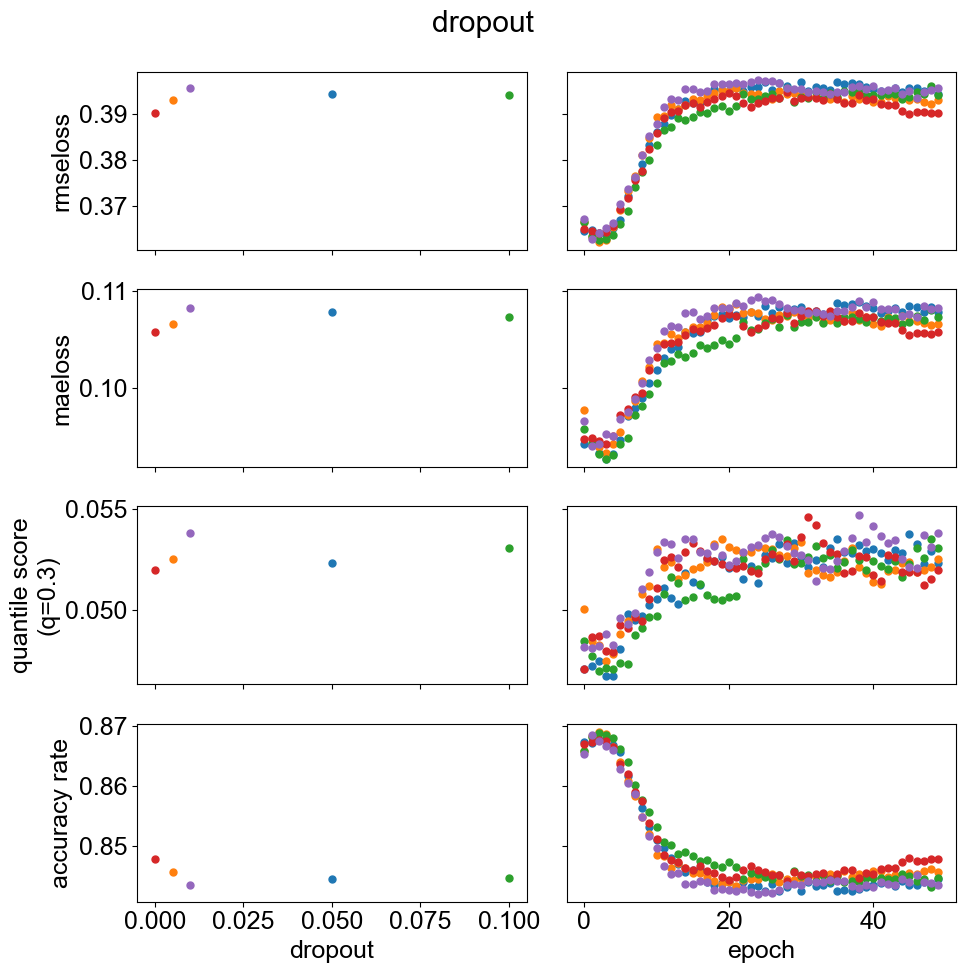

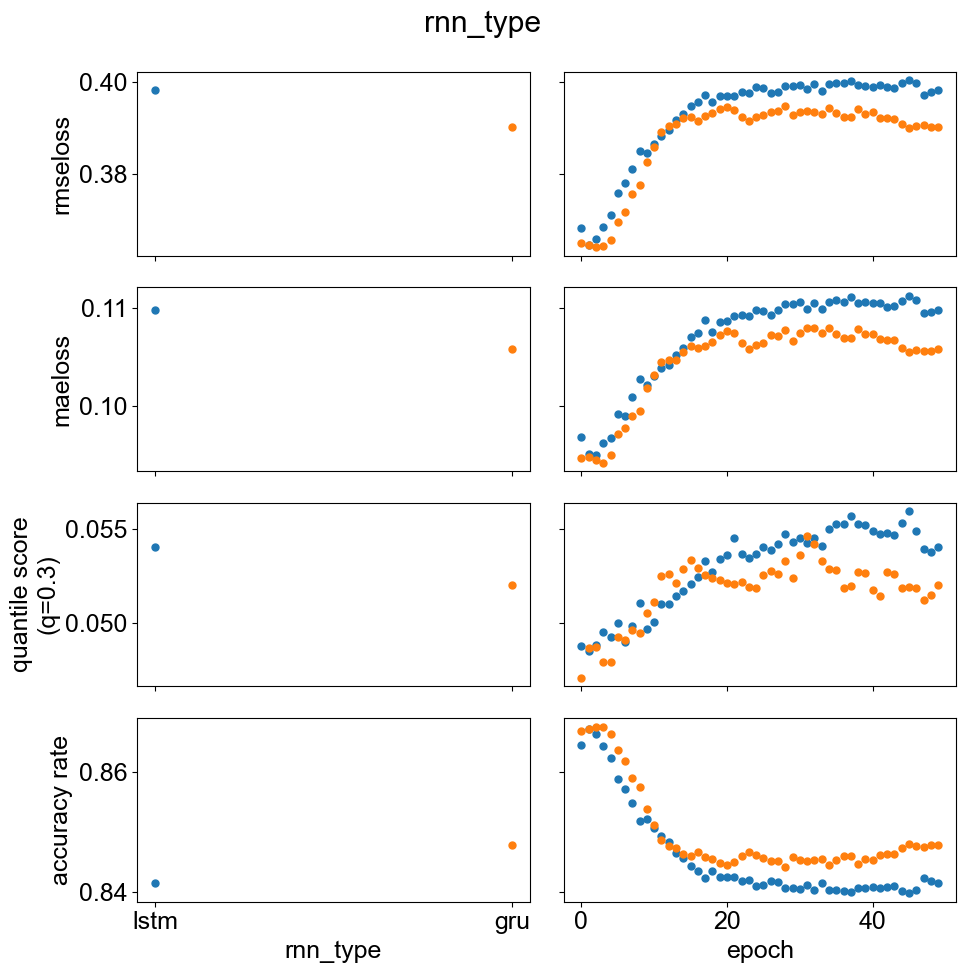

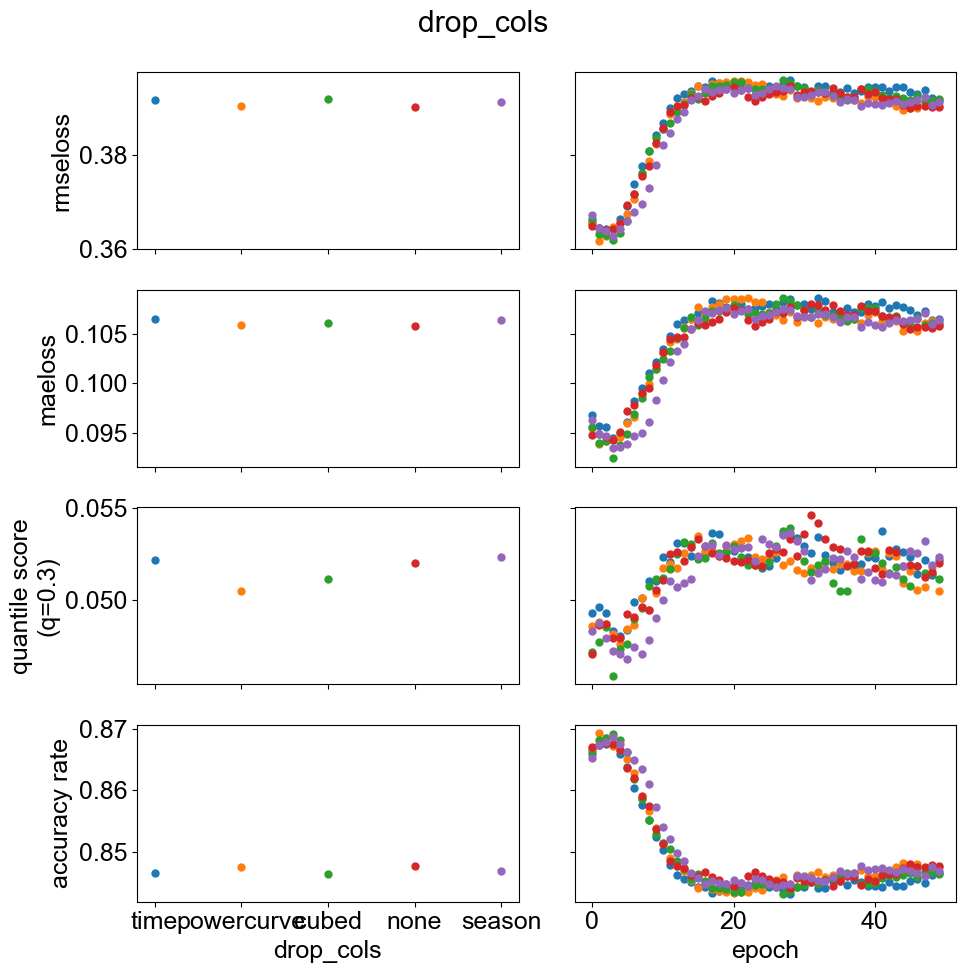

{'type': 'rnn', 'train': array([0.02336659, 0.019718  , 0.0194773 , 0.01929743, 0.01914901,
       0.01903276, 0.01895302, 0.01889215, 0.01885556, 0.0188089 ,
       0.01876556, 0.01873962, 0.0187003 , 0.01868503, 0.0186619 ,
       0.01864079, 0.01862348, 0.01860899, 0.01860055, 0.01859385,
       0.01858753, 0.01857021, 0.018569  , 0.01855006, 0.01854018,
       0.01853469, 0.01852178, 0.01851374, 0.01850034, 0.01849994,
       0.01850648, 0.01850241, 0.01849001, 0.01847302, 0.01847954,
       0.01847423, 0.01847835, 0.01846624, 0.01846441, 0.01845881,
       0.01845187, 0.01844539, 0.01844415, 0.01844814, 0.01843852,
       0.01844404, 0.01842958, 0.01843753, 0.01842116, 0.01842751]), 'rmseloss': array([0.37669581, 0.37577757, 0.37536054, 0.37409806, 0.37388267,
       0.37359859, 0.37355337, 0.37314934, 0.3736392 , 0.37301522,
       0.37303441, 0.37301896, 0.37297232, 0.37295911, 0.37290797,
       0.37264616, 0.3725033 , 0.37226287, 0.37260698, 0.3727918 ,
       0.37262045, 0.37

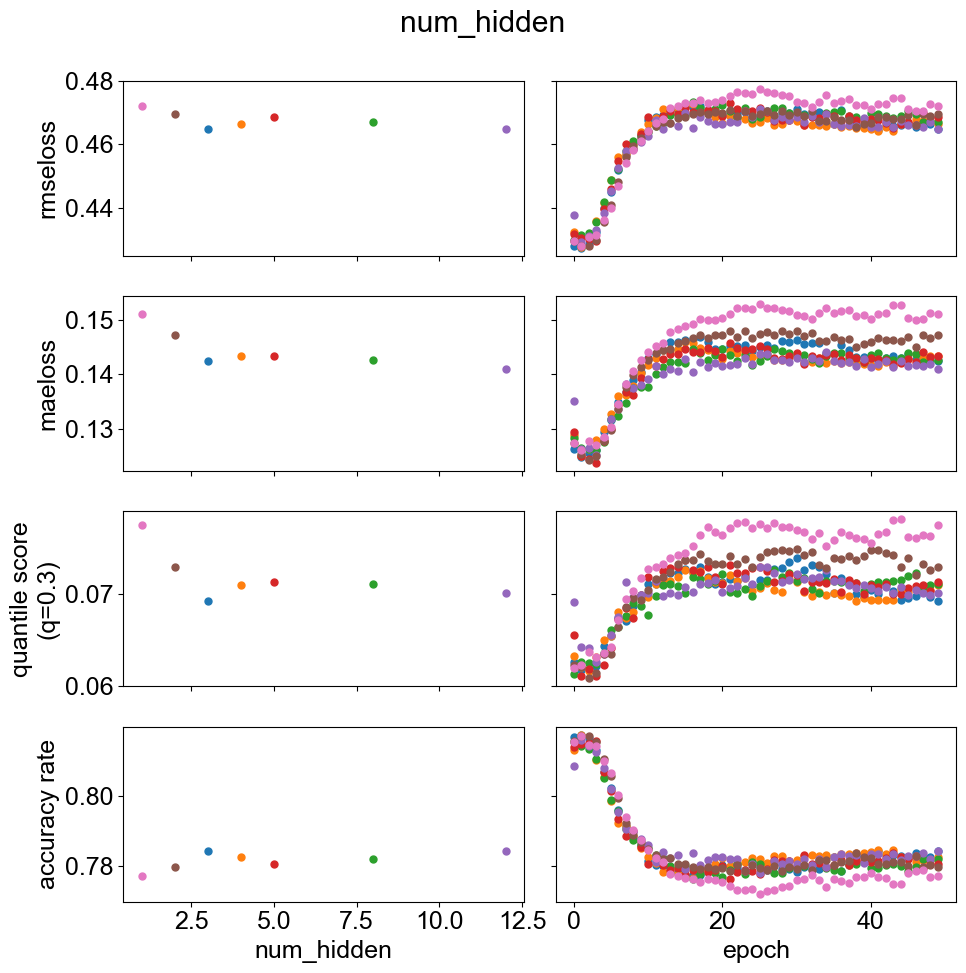

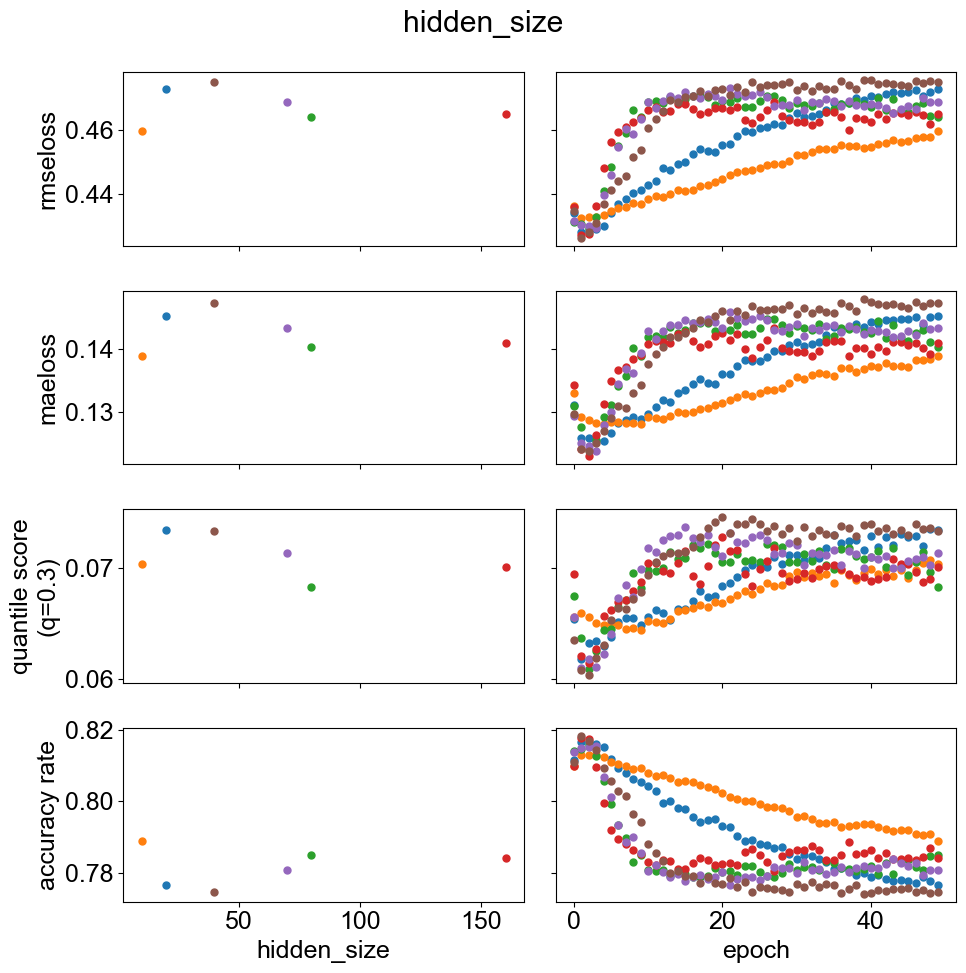

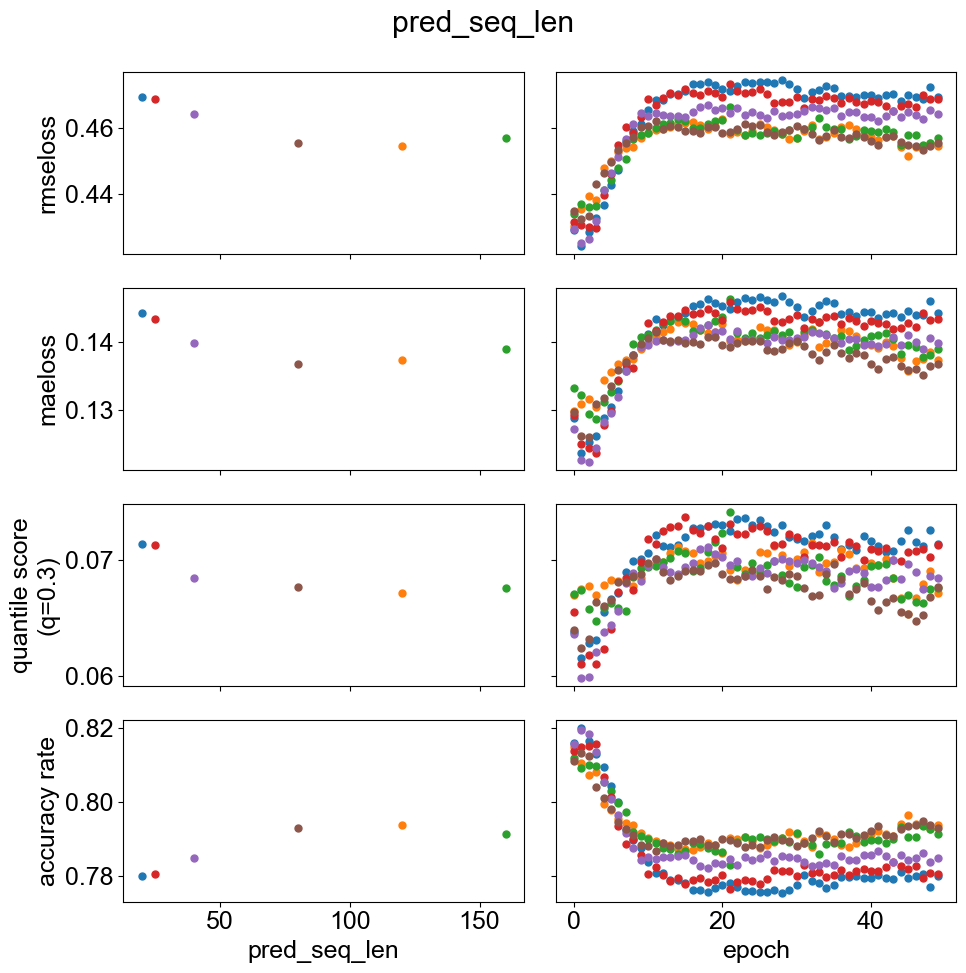

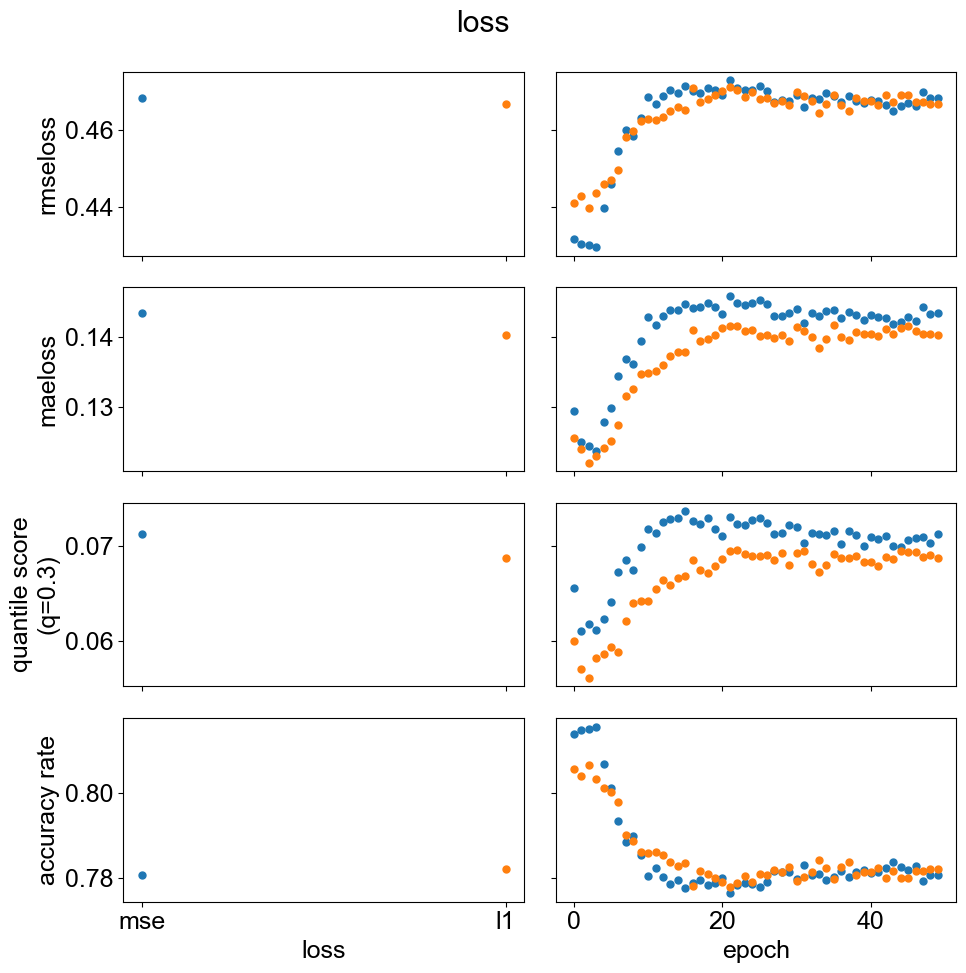

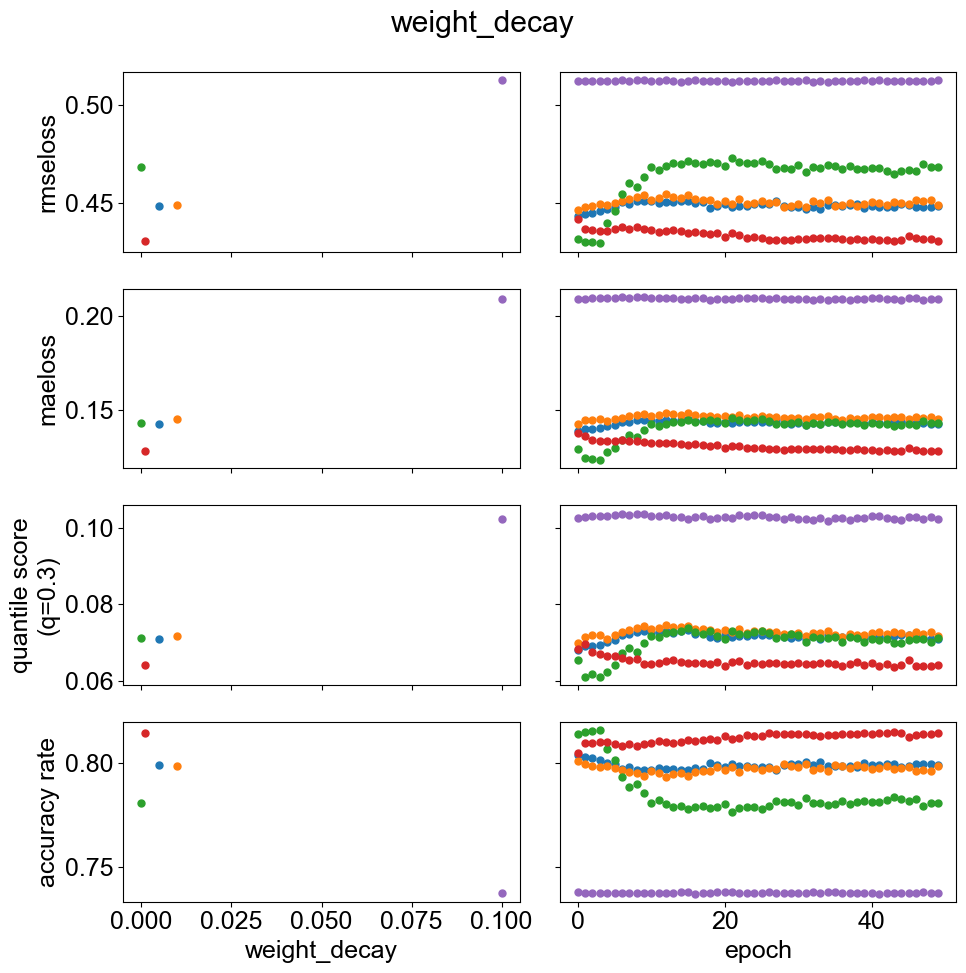

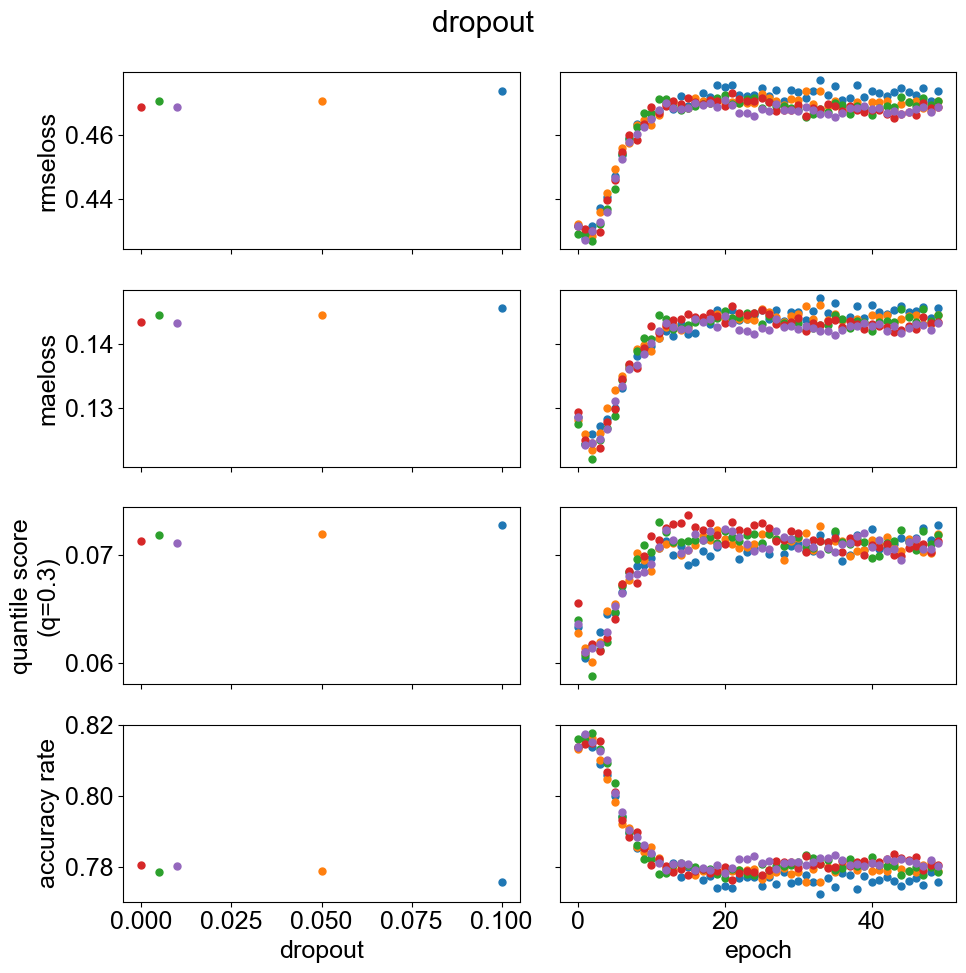

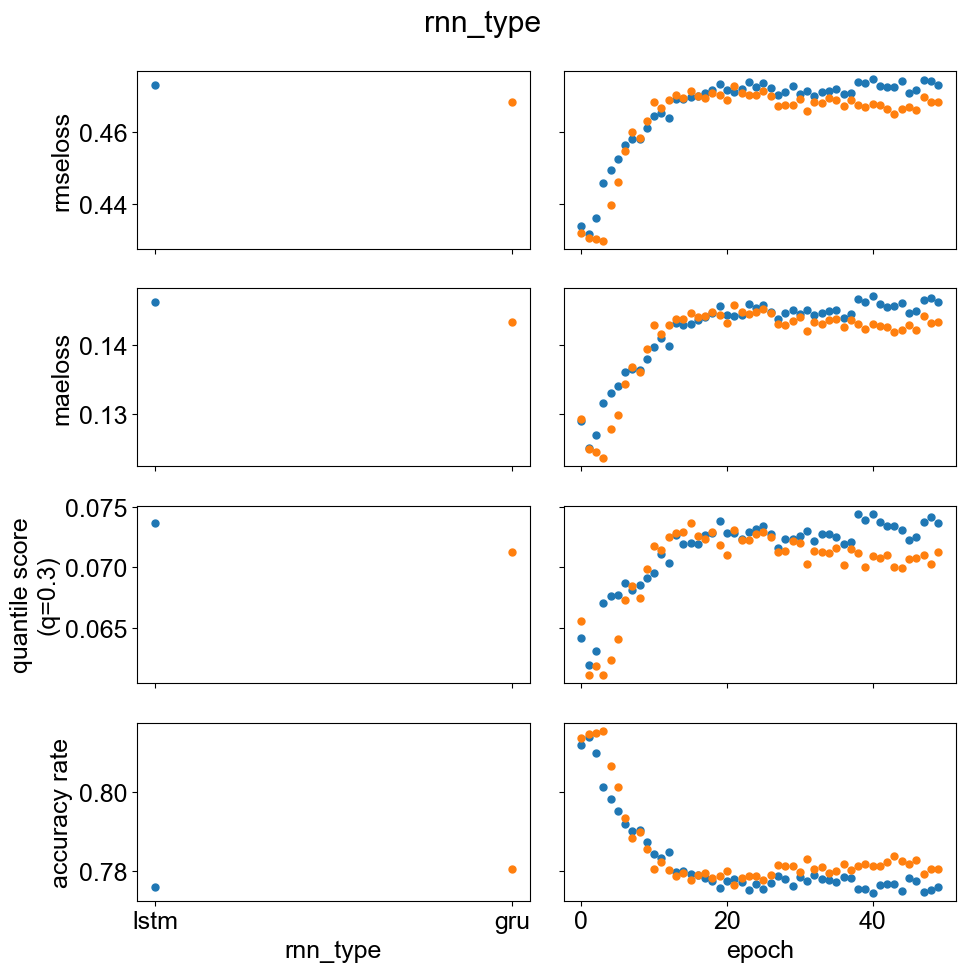

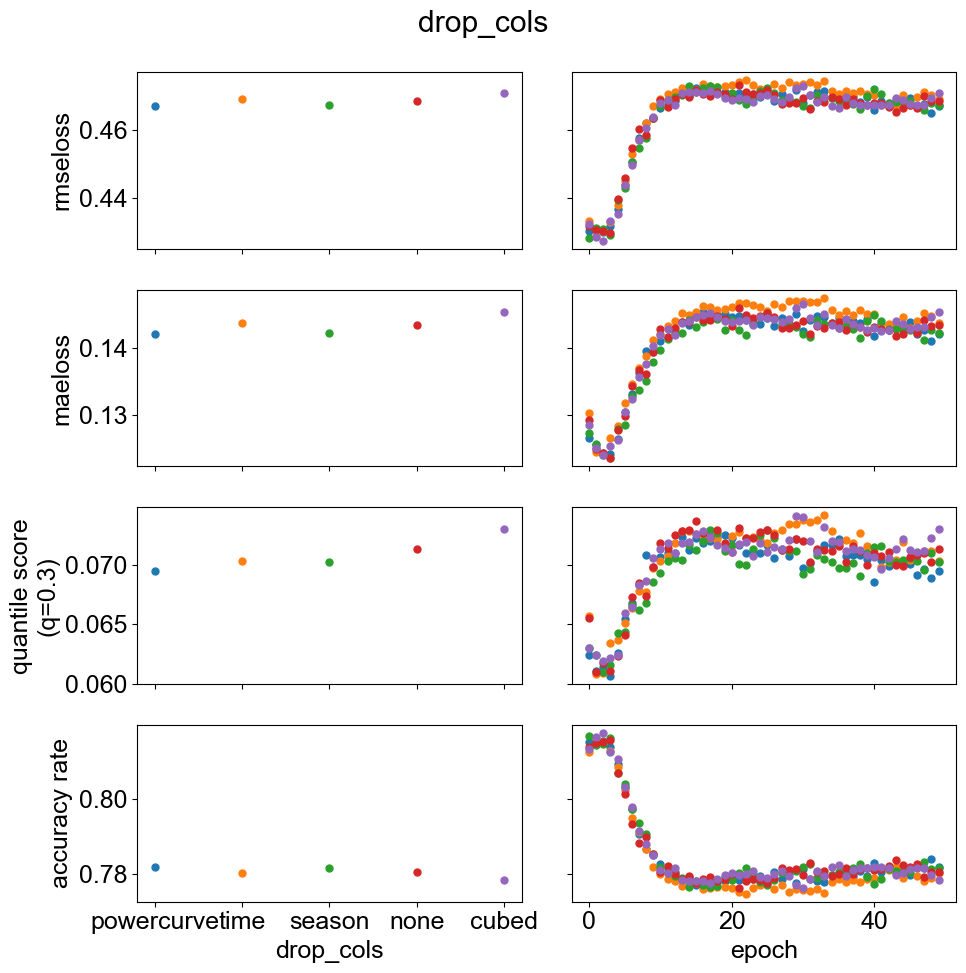

{'type': 'rnn', 'train': array([0.03881971, 0.03565319, 0.03452789, 0.03386381, 0.03344696,
       0.03306819, 0.03272052, 0.03249553, 0.0323533 , 0.0322002 ,
       0.03210404, 0.03194468, 0.03183883, 0.03174882, 0.03166333,
       0.03158958, 0.03151943, 0.03146595, 0.03140649, 0.03133898,
       0.03128497, 0.03125608, 0.0311817 , 0.03114221, 0.03108876,
       0.03105842, 0.03101868, 0.03099352, 0.0309442 , 0.03093137,
       0.03087282, 0.03084189, 0.03080788, 0.03077962, 0.03074621,
       0.03071744, 0.03070066, 0.03067774, 0.03064428, 0.03063382,
       0.03061615, 0.03059875, 0.03057655, 0.03055589, 0.0305393 ,
       0.03052015, 0.03049432, 0.03048876, 0.03046504, 0.0304477 ]), 'rmseloss': array([0.44182476, 0.43675484, 0.43640018, 0.43586891, 0.43611306,
       0.43692965, 0.43810951, 0.43712199, 0.43812455, 0.43699147,
       0.43657001, 0.4355384 , 0.43584346, 0.43642027, 0.43577781,
       0.43512494, 0.43537755, 0.43496752, 0.43425375, 0.43471912,
       0.4330036 , 0.43

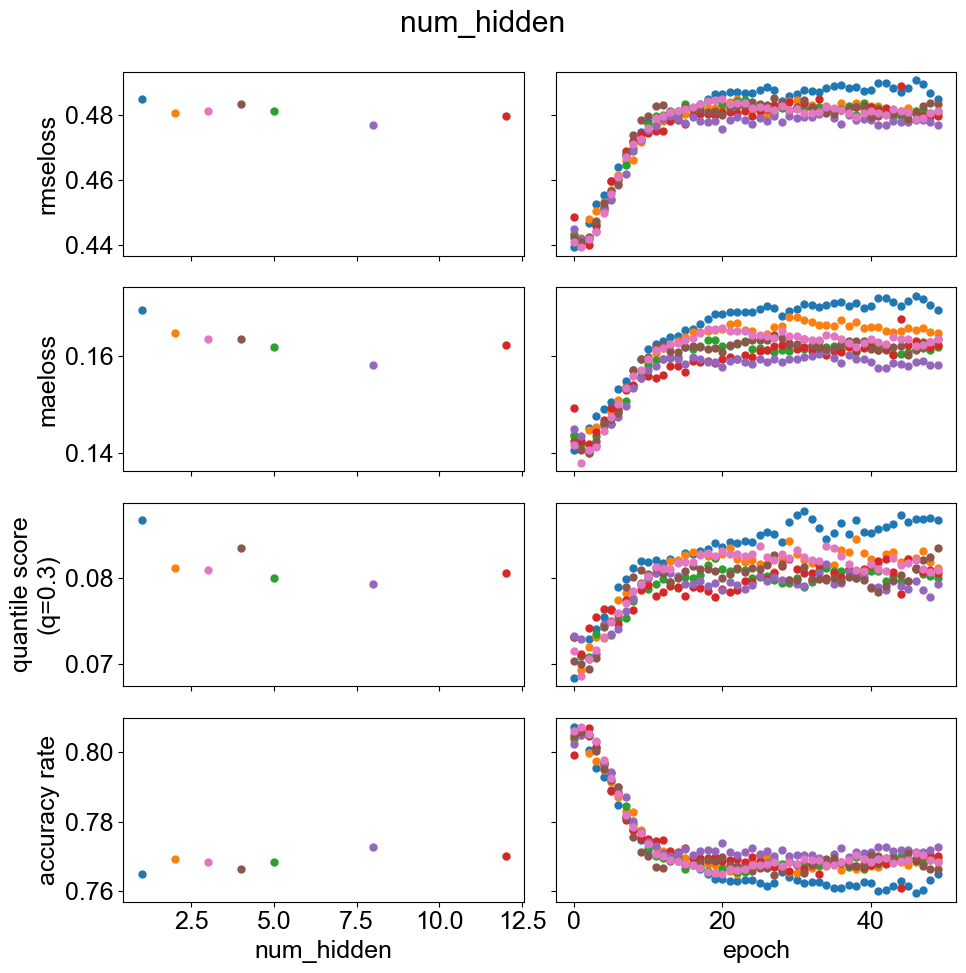

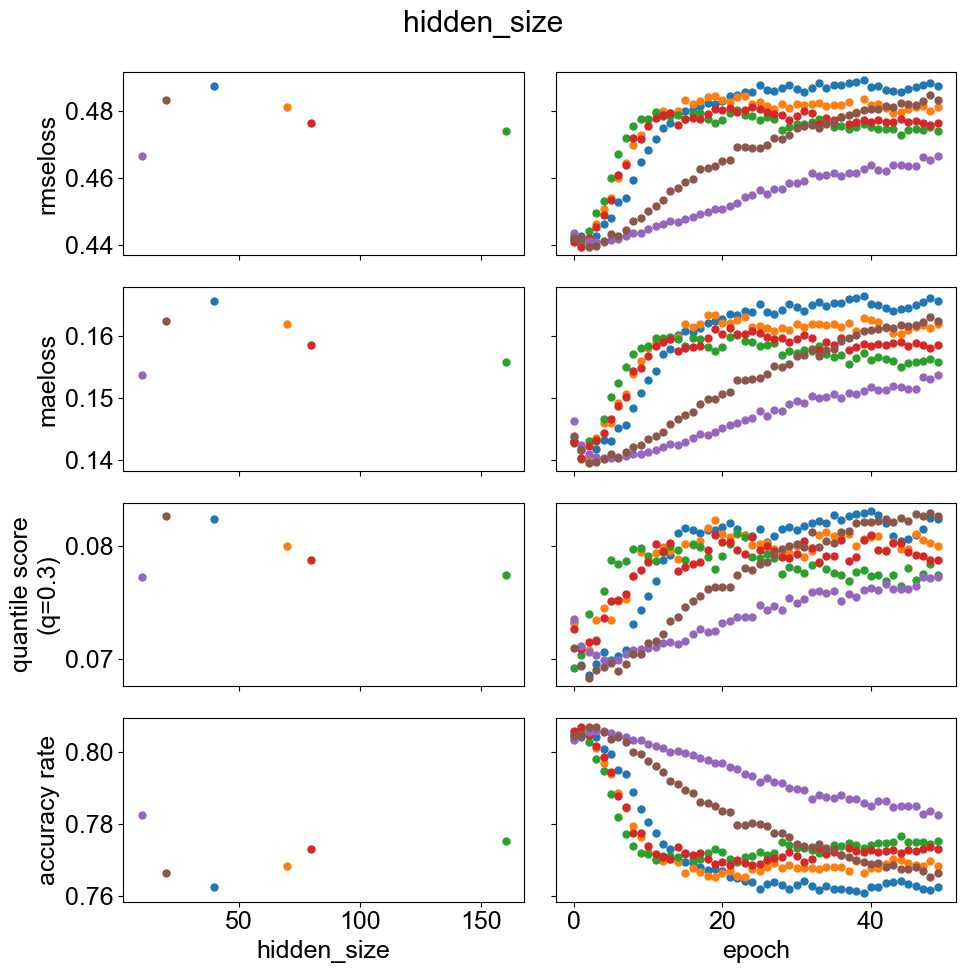

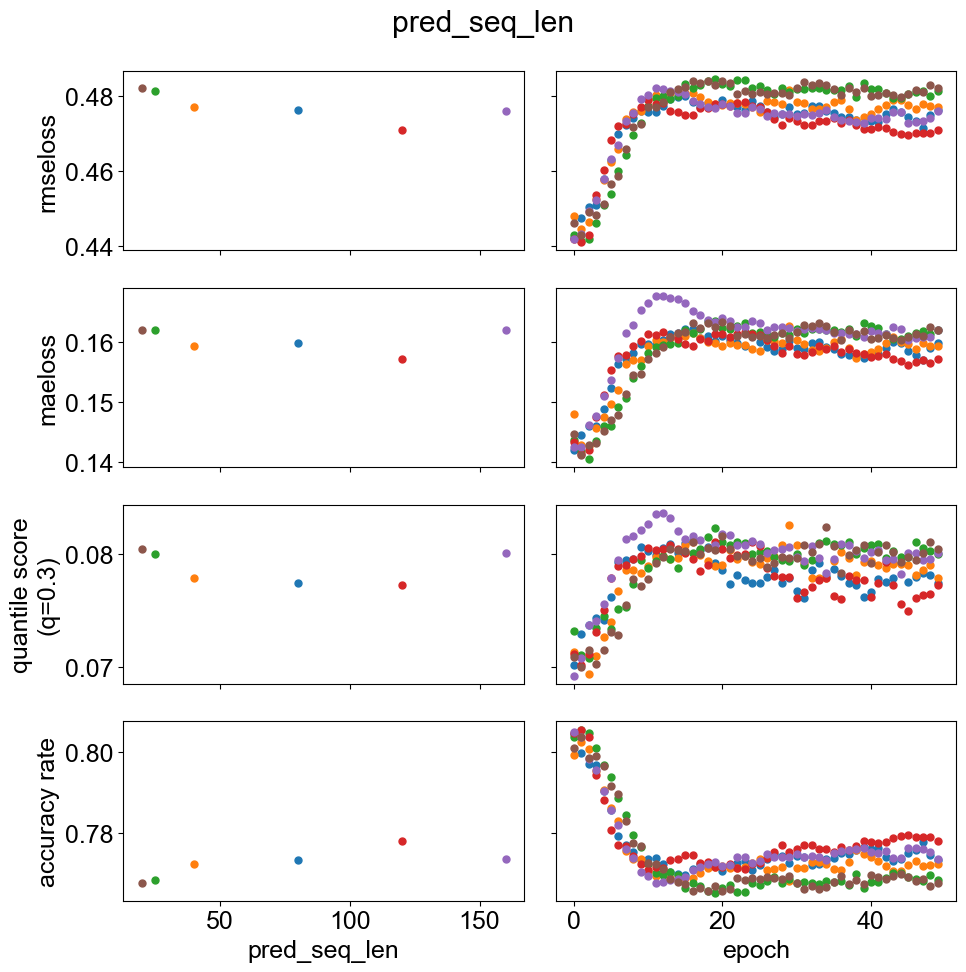

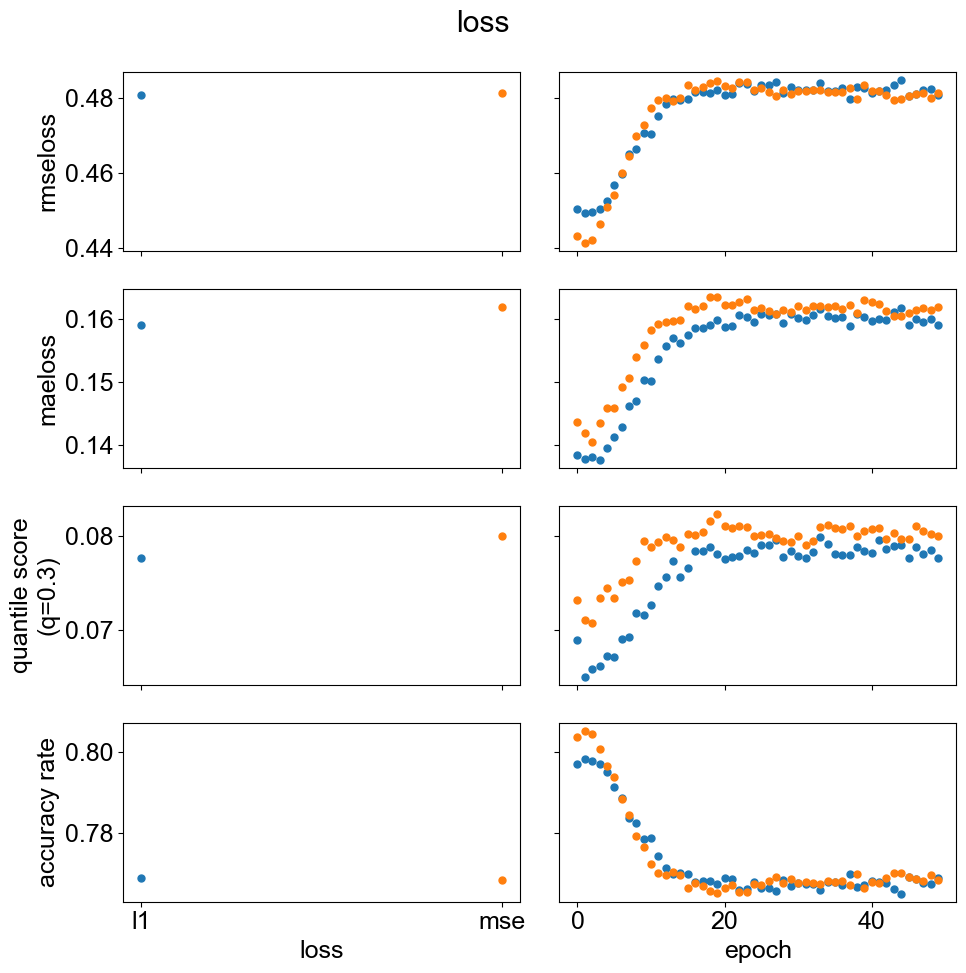

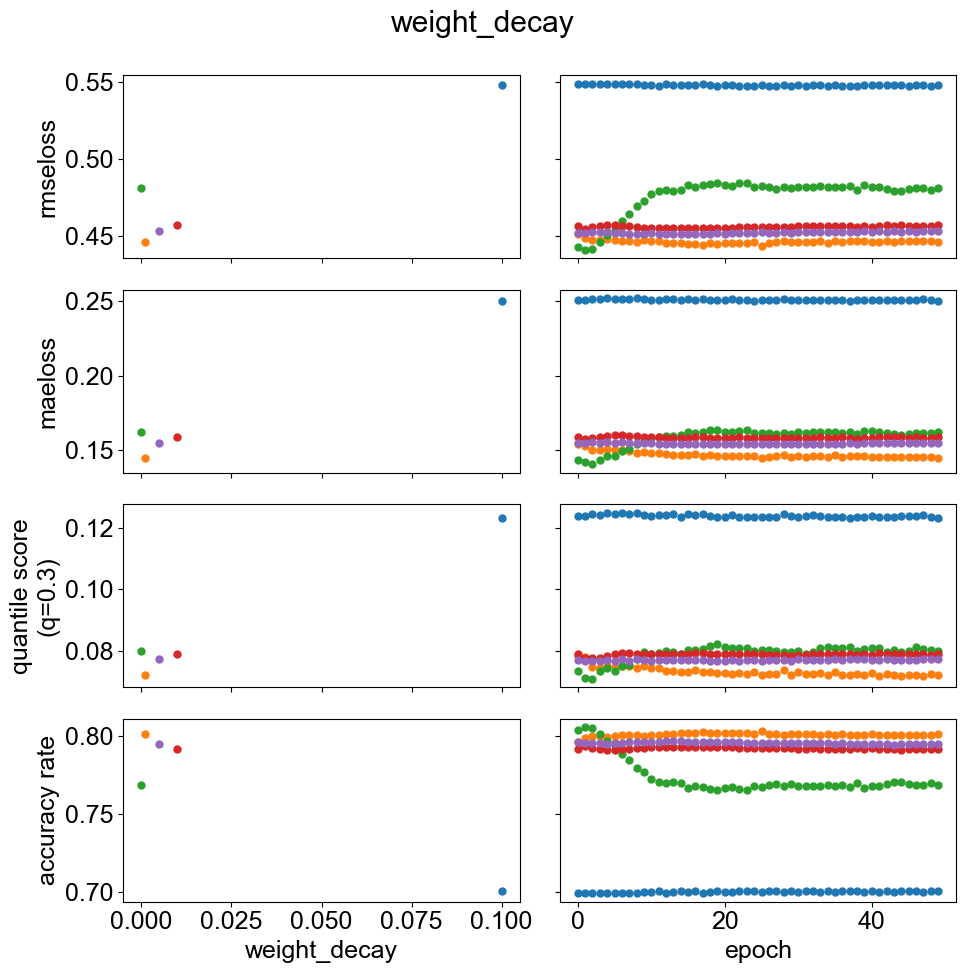

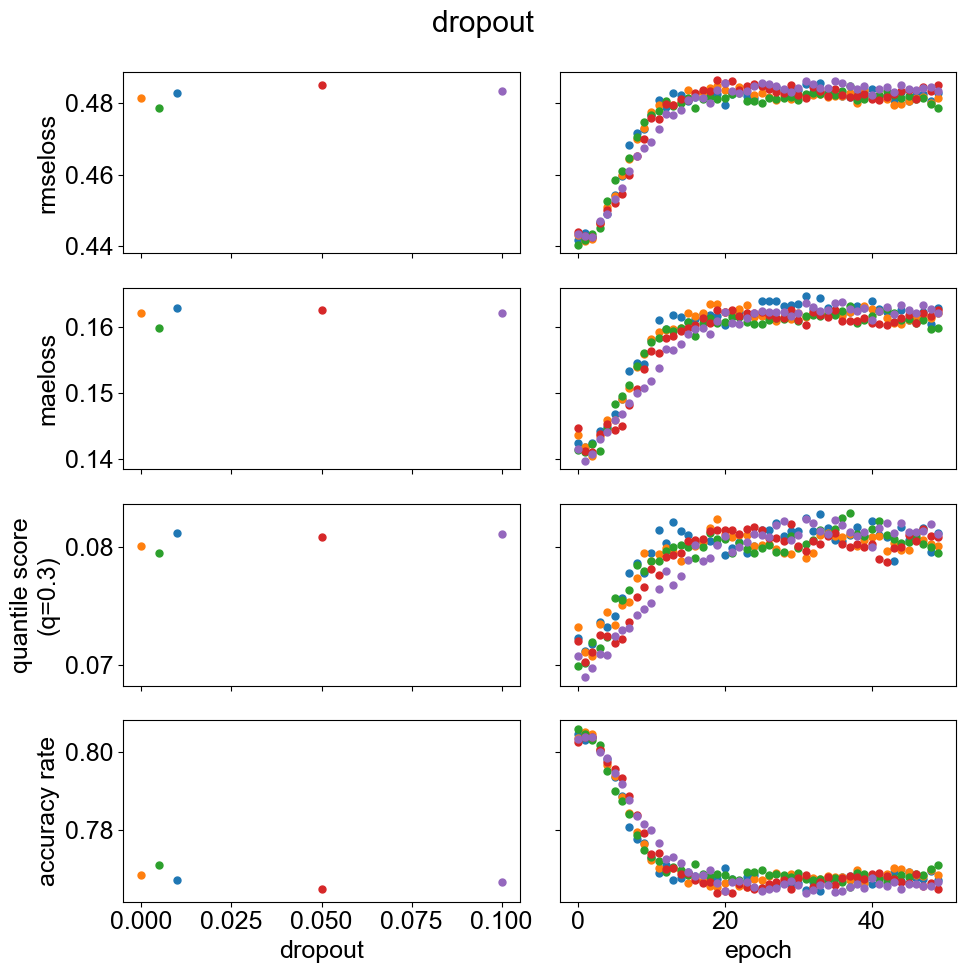

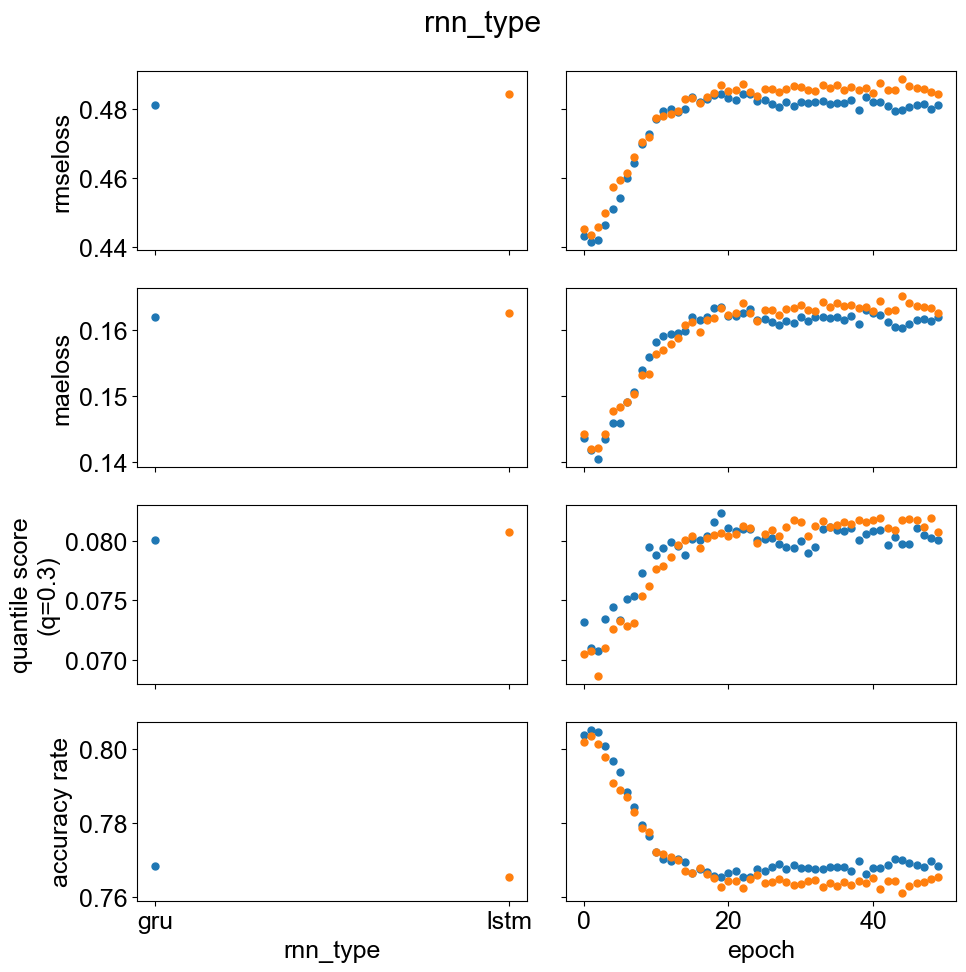

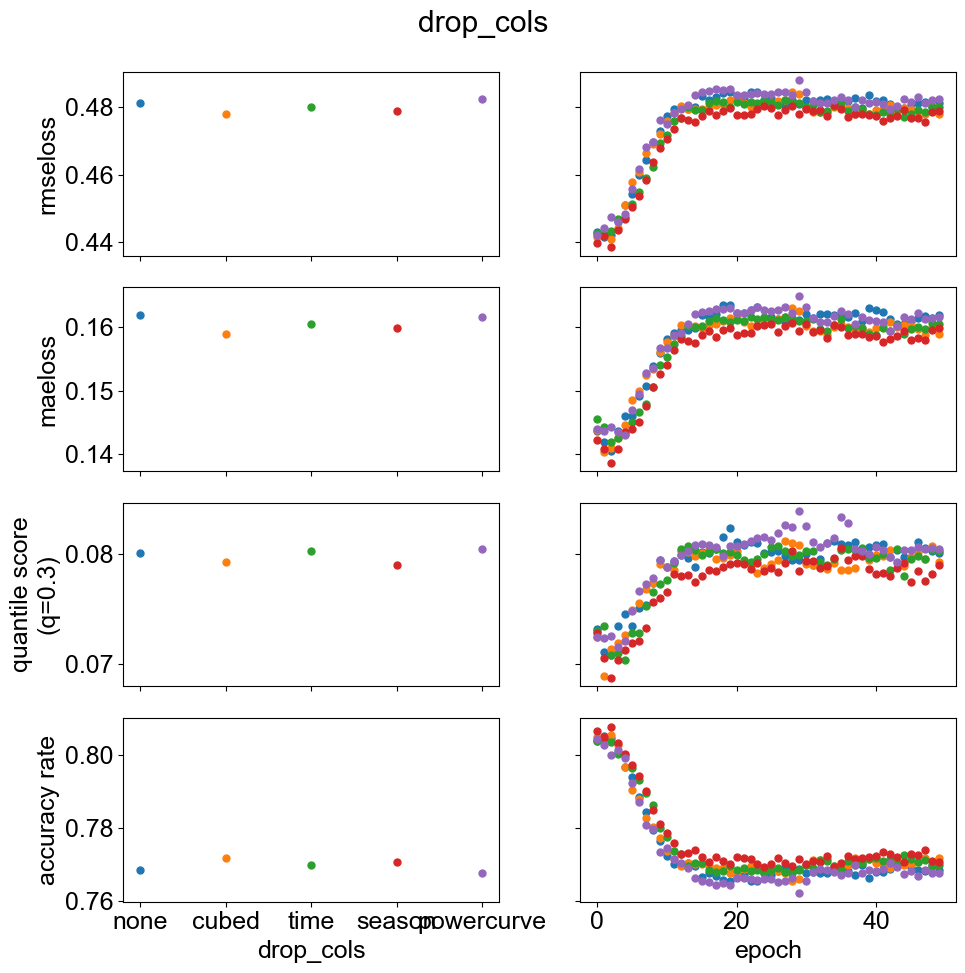

{'type': 'rnn', 'train': array([0.04375035, 0.03954484, 0.0391759 , 0.03876855, 0.03840395,
       0.03812391, 0.0377312 , 0.0373959 , 0.03717444, 0.03698636,
       0.03686723, 0.03673369, 0.03664735, 0.03653809, 0.03641355,
       0.03633519, 0.0362279 , 0.03615248, 0.036046  , 0.03597205,
       0.03587274, 0.03581612, 0.03574938, 0.03570309, 0.0356437 ,
       0.03562231, 0.03555878, 0.0355459 , 0.03551412, 0.03547978,
       0.03546189, 0.03542565, 0.03540441, 0.03537446, 0.0353543 ,
       0.03531497, 0.03531369, 0.03527912, 0.03526566, 0.03524353,
       0.03520198, 0.03517266, 0.03513213, 0.03512226, 0.03508275,
       0.03504272, 0.03498949, 0.03496896, 0.03495558, 0.03493478]), 'rmseloss': array([0.45184125, 0.44867352, 0.44782188, 0.44785991, 0.44829236,
       0.44742884, 0.44706853, 0.44691781, 0.44670934, 0.44744639,
       0.44679573, 0.44675656, 0.44585546, 0.44581988, 0.4455598 ,
       0.4451529 , 0.4453773 , 0.4446116 , 0.44564716, 0.44512417,
       0.44576067, 0.44

In [3]:
font = {'family' : 'arial',
        'weight' : 'normal',
        'size'   : 18}
matplotlib.rc('font', **font)

do_plot = True

for case in [3,2,1]:
    subset = {'type':'ffnn', 'case':case}
    
    for par_plot in ffnn_params:
        nns_to_check = plot_parameter(par_plot, subset, do_plot)
    
    all_accs = [nn['accuracy rate'][-1] for nn in nns_to_check]
    index_max = max(range(len(all_accs)), key=all_accs.__getitem__)
    print(nns_to_check[index_max])
    
    print(f'ffnn. case: {case}, max acc: {nns_to_check[index_max]["accuracy rate"][-1]:.2f}')
    

for case in [3,2,1]:
    subset = {'type':'cnn', 'case':case}
    
    for par_plot in cnn_params:
        nns_to_check = plot_parameter(par_plot, subset, do_plot)
    
    all_accs = [nn['accuracy rate'][-1] for nn in nns_to_check]
    index_max = max(range(len(all_accs)), key=all_accs.__getitem__)
    print(nns_to_check[index_max])
    
    print(f'cnn. case: {case}, max acc: {nns_to_check[index_max]["accuracy rate"][-1]:.2f}')
    

for case in [3,2,1]:
    subset = {'type':'rnn', 'case':case}
    
    for par_plot in rnn_params:
        nns_to_check = plot_parameter(par_plot, subset, do_plot)
    
    all_accs = [nn['accuracy rate'][-1] for nn in nns_to_check]
    index_max = max(range(len(all_accs)), key=all_accs.__getitem__)
    print(nns_to_check[index_max])
    
    print(f'rnn. case: {case}, max acc: {nns_to_check[index_max]["accuracy rate"][-1]:.2f}')
